<font color="#CA3532"><h1 align="left">**Práctica 2 de Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Multiarmed Bandits**</h2></font>

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [1]:
COLAB = True

In [2]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1000WA5q8DTZ68uoPaXddJ1TLJPBsIZpr&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=11SdrmYpGwW7xC6Nooe6aRBkORBnirrkm&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Información sobre cada variable:**

In [3]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [4]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [6]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

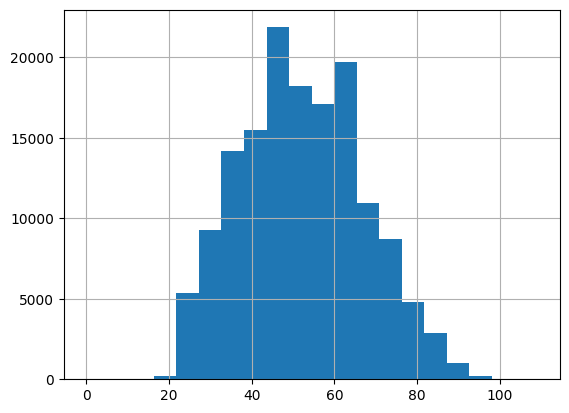

In [8]:
df["age"].hist(bins=20);

In [9]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [10]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [12]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [13]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [14]:
# Defino clase clientes:

class clientes:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -10
        return 1 # paga

In [15]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [16]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [17]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [18]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [19]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [20]:
cl_train.get_reward(1)

1

In [21]:
cl_train.df["SeriousDlqin2yrs"].value_counts()

0    69950
1     5568
Name: SeriousDlqin2yrs, dtype: int64

### Tarea 1

Calcula la evolución del reward total y regret total en training de:
 a) un algoritmo aleatorio
 b) un algoritmo que siempre da el crédito
 c) un algoritmo que nunca da el crédito

 Calcula en otra gráfica la evolución de su reward promedio y regret promedio. ¿Tienen sentido los resultados?

In [22]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

#### Cálculo del valor óptimo $V^*$

Debido a que conocemos la distribución de las acciones, sabemos de antemano que la acción 1 es la óptima. Por lo tanto, el valor de $V^*$ será el valor del refuerzo promedio obtenido de esta acción.

En caso de no conocer estos datos, lo que se podría hacer es ir estimando en cada iteración cuál es el valor que el bandit estima como óptimo.

In [25]:
valor_optimo = (len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 0]) - len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 1])*10)/len(cl_train.df)

In [ ]:
valor_optimo

0.18896157207553166

In [ ]:
total_reward_random = []
total_reward_0 = []
total_reward_1 = []
total_regret_random = []
total_regret_0 = []
total_regret_1 = []

#Valores de acciones estimados
q0 = []
q1 = []
q0_rand = []
q1_rand = []

cl_train = clientes(df_train)

for i in range(len(df_train)):
  
  #Simulación de llegada de cliente
  cl_train.cliente()
  accion = np.random.randint(2)

  r0 = cl_train.get_reward(0)
  total_reward_0.append(r0)
  q0.append(r0)
  #Obtenemos el regret para la acción restandole al valor óptimo 
  #el reward promedio que hemos obtenido al realizar esa acción.
  total_regret_0.append(valor_optimo - np.mean(q0))


  r1 = cl_train.get_reward(1)
  total_reward_1.append(r1)
  q1.append(r1)
  total_regret_1.append(valor_optimo - np.mean(q1))

  if accion == 0:
    total_reward_random.append(r0)
    q0_rand.append(r0)
    total_regret_random.append(valor_optimo - np.mean(q0_rand))
  else:
    total_reward_random.append(r1)
    q1_rand.append(r1)
    total_regret_random.append(valor_optimo - np.mean(q1_rand))

#### Reward y regret acumulado

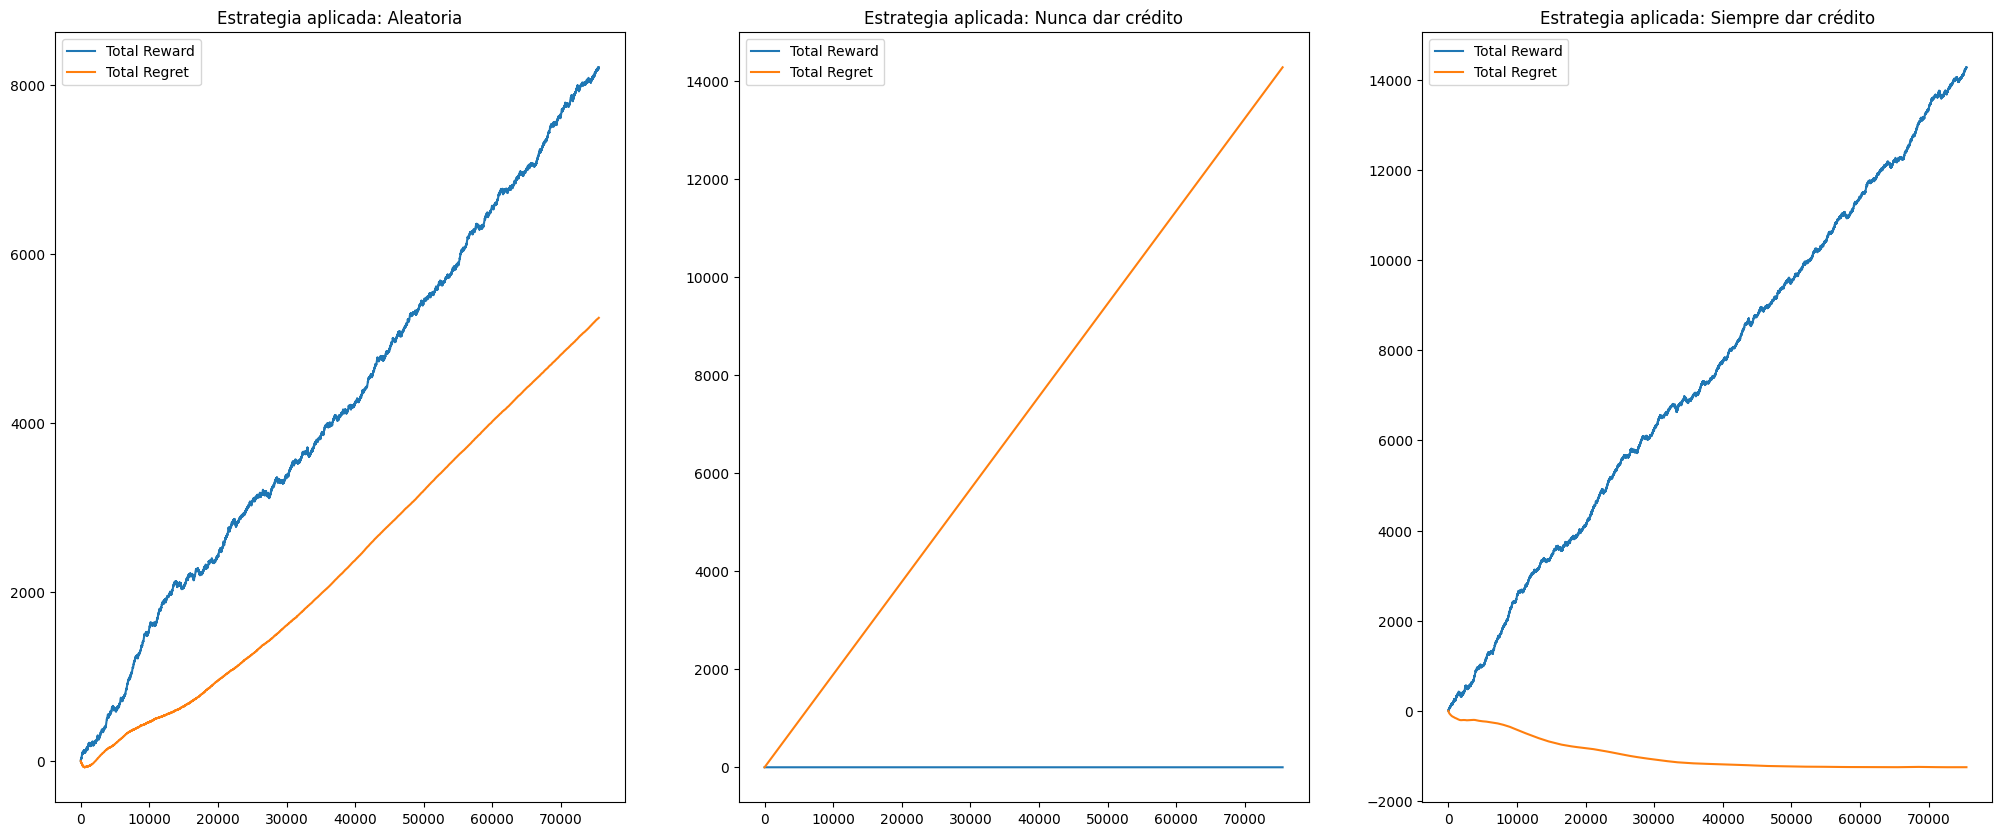

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random), label="Total Reward")
axs[0].plot(np.cumsum(total_regret_random), label="Total Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0), label="Total Reward")
axs[1].plot(np.cumsum(total_regret_0), label="Total Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1), label="Total Reward")
axs[2].plot(np.cumsum(total_regret_1), label="Total Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")
plt.show()

#### Reward y regret promedio

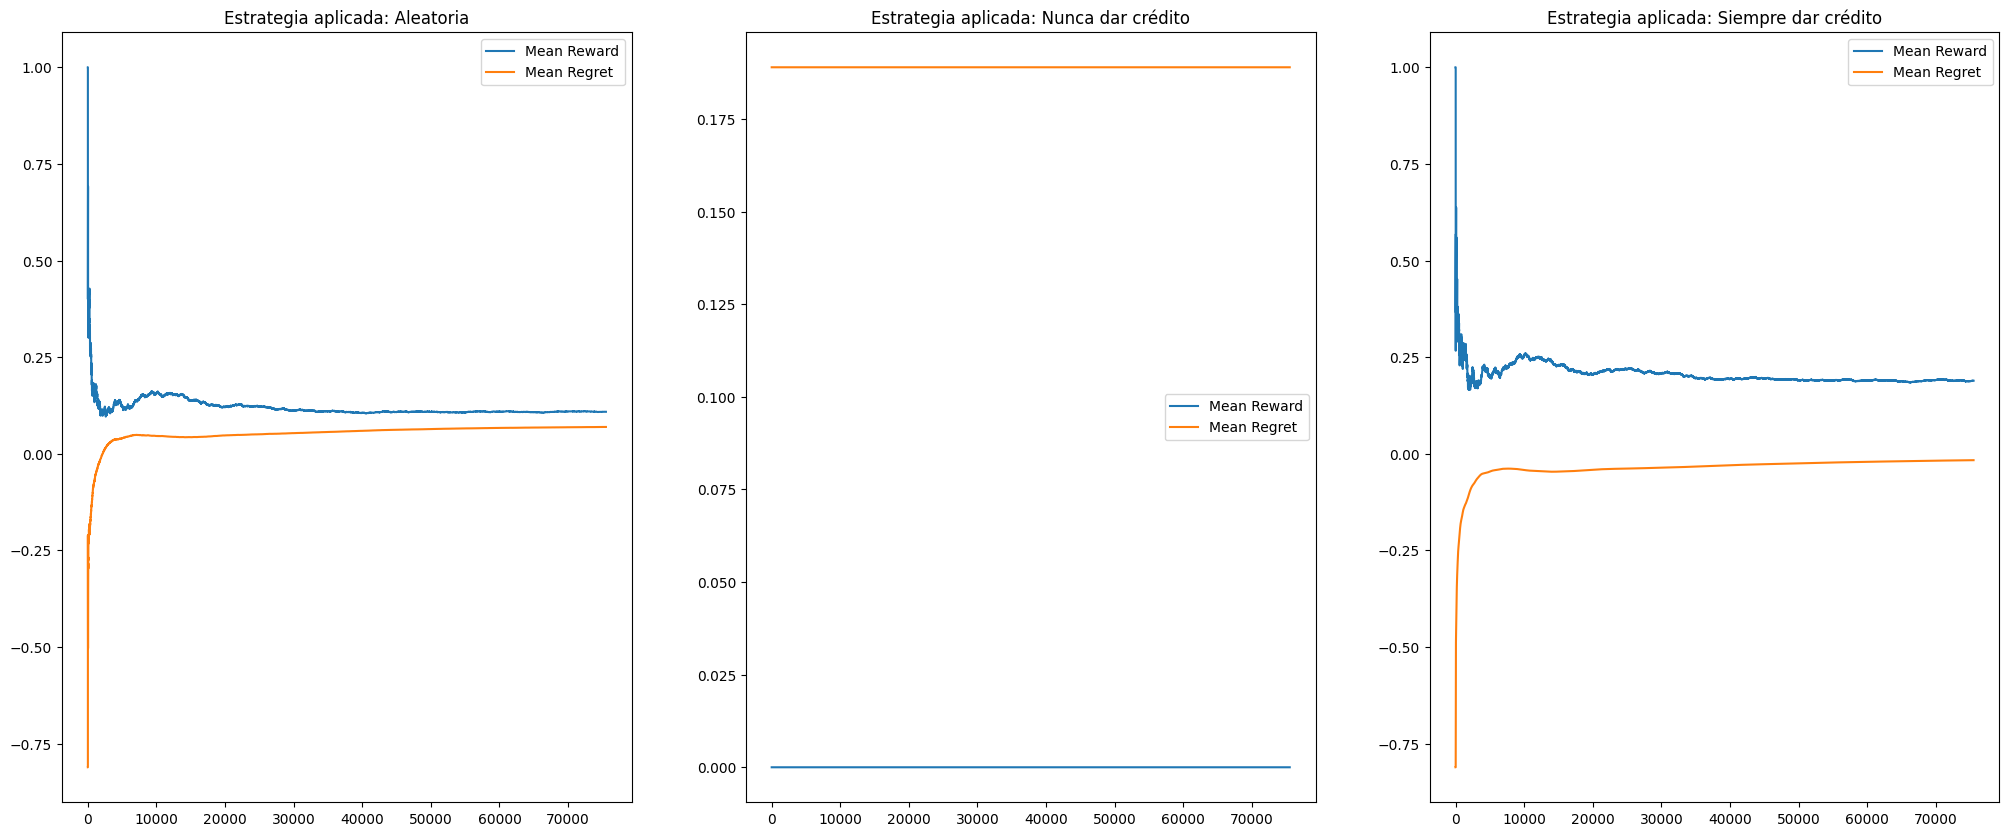

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[0].plot(np.cumsum(total_regret_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[1].plot(np.cumsum(total_regret_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[2].plot(np.cumsum(total_regret_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")
plt.show()

Viendo estos resultados podemos ver que efectivamente la acción que maximiza el reward acumulado y minimiza el regret es siempre dar crédito. Esto además se refleja en los promedios, en los que podemos ver que un agente que nunca da crédito siempre se queda con el mismo regret promedio y sin obtener reward, mientras que el agente que siempre da crédito empieza con un reward promedio estimado muy alto (lo que explica el por qué el regret acumulado es negativo) y a medida que pasan las iteraciones converge al valor óptimo, con regret promedio 0.

### Tarea 2

Entrena un multiarmed bandit **no contextual** en training. Calcula las mismas métricas que en el punto 1. ¿Cuál es la estrategia que aprende el modelo?

Hemos dedicido implementar un multi-armed bandit no contextual basado en el método de Upper Confidence Bound (UCB), puesto que permite que el bandit mantenga de forma más automática un control entre exploración y explotación a medida que va descubriendo los valores de Q asociados a cada acción.

In [23]:
def mb_no_context(clientes, acciones):
  
  N_actions = np.ones(len(acciones))
  actions_taken = []
  Q_est = np.zeros(len(acciones))
  rewards = []
  regret = []

  for i in range(len(clientes.df)):
    
    clientes.cliente()
    ucb_id = np.argmax([Q_est[j] + np.sqrt((2*np.log(i))/N_actions[j]) 
                    for j in range(len(acciones))])
    
    N_actions[ucb_id] += 1
    actions_taken.append(acciones[ucb_id])
    reward = clientes.get_reward(acciones[ucb_id])
    Q_est[ucb_id] += reward / N_actions[ucb_id]

    rewards.append(reward)
    regret.append(valor_optimo - reward)

  
  return Q_est, actions_taken, rewards, regret

In [26]:
cl_train = clientes(df_train)
acciones = [0, 1]
Q, actions, rewards, regret = mb_no_context(cl_train, acciones)

<ipython-input-23-754ae31a579d>:12: RuntimeWarning: divide by zero encountered in log
  ucb_id = np.argmax([Q_est[j] + np.sqrt((2*np.log(i))/N_actions[j])
<ipython-input-23-754ae31a579d>:12: RuntimeWarning: invalid value encountered in sqrt
  ucb_id = np.argmax([Q_est[j] + np.sqrt((2*np.log(i))/N_actions[j])


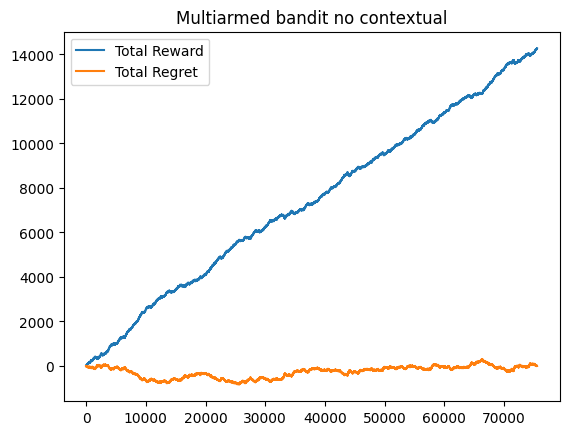

In [ ]:
plt.plot(np.cumsum(rewards), label="Total Reward")
plt.plot(np.cumsum(regret), label="Total Regret")
plt.legend()
plt.title("Multiarmed bandit no contextual")
plt.show()

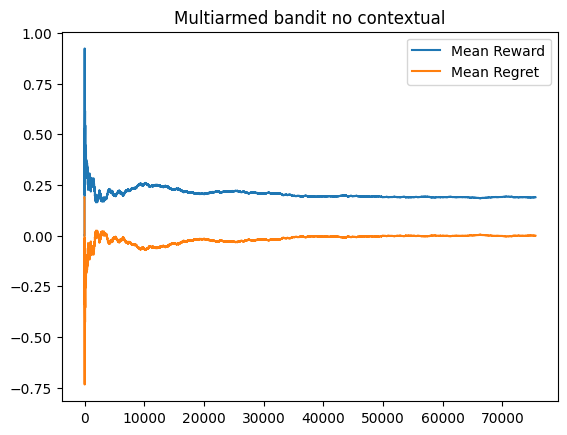

In [ ]:
plt.plot(np.cumsum(rewards)/np.arange(1, len(rewards) + 1), label="Mean Reward")
plt.plot(np.cumsum(regret)/np.arange(1, len(regret) + 1), label="Mean Regret")
plt.legend()
plt.title("Multiarmed bandit no contextual")
plt.show()

In [ ]:
print(actions[:20])

[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print(np.unique(actions, return_counts=True))

(array([0, 1]), array([    2, 75516]))


Podemos comprobar como el bandit rápidamente descubre que la mejor acción a explotar es dar crédito, puesto que solo toma la decisión de no darlo a los dos primeros clientes, hasta que decide explorar la opción de darlo y de ahí no se sale de esa acción, así que observamos un comportamiento en las gráficas prácticamente idéntico a lo que sería el agente que siempre da crédito.

### Tarea 3

Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en los puntos anteriores


#### NOTA

En este caso concreto, hemos considerado apropiado que la medida del regret se plantee de una forma diferente.

Debido a que el bandit actúa de forma contextual, hay una acción óptima concreta en base al contexto dado, la cual nosotros conocemos debido a que el reward se determina en base al valor de la columna *SeriousDlqin2yrs*, en la que si el valor de la misma es 1, lo conveniente es no dar crédito, y si es 0 dárselo. Por tanto, el valor óptimo ya no es fijo, si no que lo determinamos en base a cual es la acción ideal en cada caso concreto.

In [27]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1fCnGzS5U_x-k_03op_XJkHVS4jpvjSxS',
                                        dest_path='./spacebandits.zip', unzip=True)

Unzipping...Done.


In [28]:
from space_bandits import LinearBandits

Instructions for updating:
non-resource variables are not supported in the long term


In [29]:
def show_records(records):
    cumm_ideal_rew_plt = np.cumsum(records["ideal_reward_record"])    
    cummulative_reward_plt = np.cumsum(records["reward_record"])
        
    ts = records['timesteps']
    plt.plot(ts, cummulative_reward_plt, label='cummulative reward')
    plt.plot(ts, cumm_ideal_rew_plt, label='maximum reward')
    plt.plot(ts, cumm_ideal_rew_plt - cummulative_reward_plt,
             color='red', label='cummulative regret')
    plt.plot([ts[0],ts[-1]], [0,0], ':k')
    plt.title('Cummulative Reward & Regret')
    plt.legend()
    plt.show()
    print("Total reward      :", cummulative_reward_plt[-1])
    print("Total ideal reward:", cumm_ideal_rew_plt[-1])


In [30]:
def iterate_model(modelo, clientes, acciones_ideales, steps, records=None,
                  plot_frequency=250, avg_length=150):
    
    if records is None:
        records = dict()
        records['timesteps'] = []
        records['reward_record'] = []
        records['ideal_reward_record'] = []
        records['regret_record'] = []
        records['avg_regret_record'] = []
        start = 0
    else:
        start = records['timesteps'][-1] + 1
    for i in range(start, start+steps):
        records['timesteps'].append(i)
        
        clientes.cliente()

        contexto = clientes.get_context().values
        
        accion = modelo.action(contexto) # acción recomendada por el modelo
        
        # se lanza la acción sobre el cliente y eso produce una ganancia (reward)
        reward = clientes.get_reward(accion) # <- ganancia (reward) obtenida tras lanzar la acción

        modelo.update(contexto, accion, reward) # actualización del modelo
        records['reward_record'].append(reward)

        
        # acción ideal: es aquella que se debería seleccionar
        # si conociéramos el indicador de delincuencia del cliente
        # ** El agente desconoce todas esas cosas **
        accion_ideal        = acciones_ideales[clientes.df.iloc[clientes.i]["SeriousDlqin2yrs"]]
        reward_accion_ideal = clientes.get_reward(accion_ideal)
        records['ideal_reward_record'].append(reward_accion_ideal)
        
        #Recordemos que en este caso, el regret está determinado por el reward
        #asociado a la acción óptima a tomar en ese momento
        regret = reward_accion_ideal - reward
        records['regret_record'].append(regret)
        

        if i <= avg_length:
            if i < avg_length:
                moving_avg=0
            else:
                moving_avg = np.array(records['regret_record']).mean()
            if i == avg_length:
                records['avg_regret_record'] = [moving_avg]*avg_length
        else:
            moving_avg = sum(records['regret_record'][-avg_length:])/avg_length
        records['avg_regret_record'].append(moving_avg)
        if (i+1) % plot_frequency == 0 and i > 0:
            show_records(records)
            plt.show()
    return records

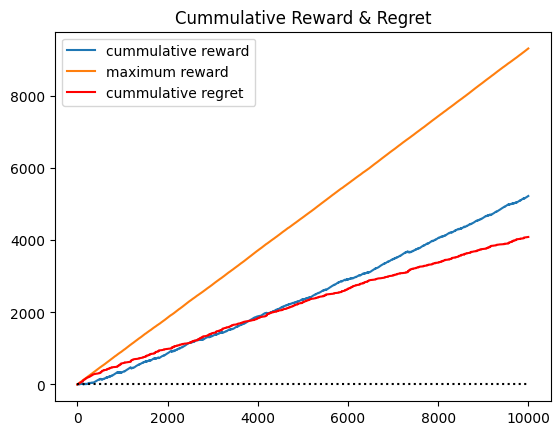

Total reward      : 5230
Total ideal reward: 9323


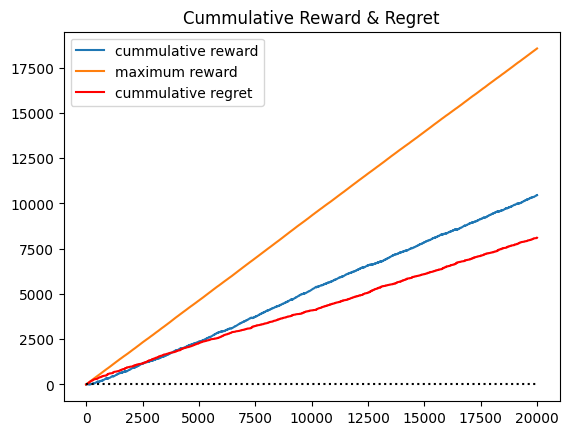

Total reward      : 10454
Total ideal reward: 18557


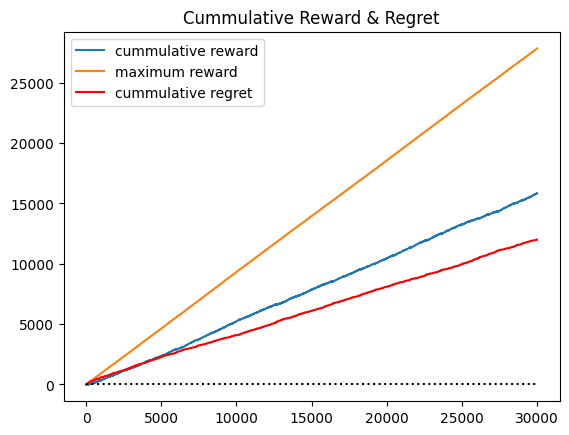

Total reward      : 15840
Total ideal reward: 27840


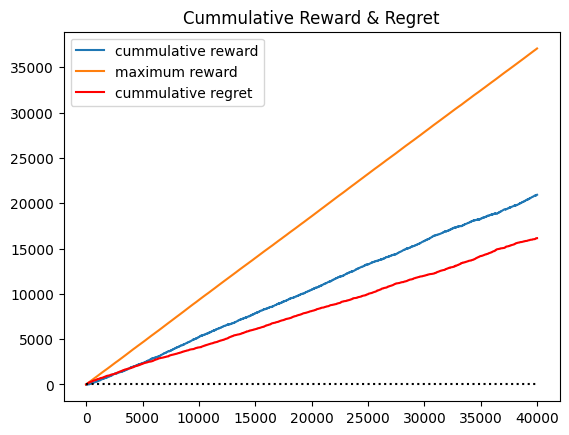

Total reward      : 20927
Total ideal reward: 37070


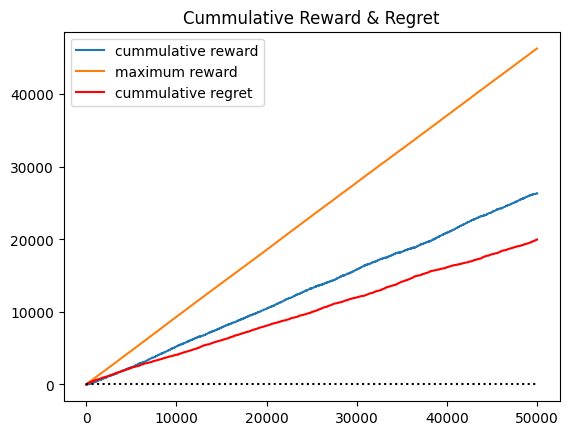

Total reward      : 26338
Total ideal reward: 46318


In [ ]:
acciones_ideales = {0: 1,
                    1: 0}

cl_train = clientes(df_train)

n_acciones = 2
n_features = len(cl_train.get_context())

model = LinearBandits(n_acciones, n_features, initial_pulls=100)

records = iterate_model(model, cl_train, acciones_ideales, steps=50000, plot_frequency=10000)

In [ ]:
print(f"Reward promedio obtenido: {np.mean(records['reward_record'])}")

Reward promedio obtenido: 0.52872


Podemos ver que los valores que obtenemos nos dan una eficiencia de en torno al 56%, lo que quiere decir que el bandit está generando ese porcentaje de recompensa con respecto a todo lo que se puede generar. Si bien podemos ver que el reward promedio obtenido es mucho mayor que en el caso del bandit no contextual, lo que indica que está desarrollando un cierto criterio a la hora de basar sus decisiones a través del contexto, no termina de llegar al ideal y se queda estancado.

### Tarea 4

Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

#### Coeficientes del modelo lineal para cada acción

In [ ]:
model.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-8.34392753e-01,  6.00400962e-03, -4.42925188e-01,  7.39507630e-07,
         2.44065574e-06, -1.31485990e-02, -1.67499681e+00, -3.95610301e-02,
        -8.68168061e-01, -2.40125024e-03,  7.58580625e-01])]

Nos ha resultado interesante observar que los coeficientes del modelo lineal asociado a no dar crédito están todos a 0, lo cual tiene sentido debido a que no hay un reward asociado a la propia acción.

#### Valores de Q obtenidos dado un contexto

In [ ]:
model.expected_values(cl_train.get_context().values)

array([0.       , 0.1480612])

#### Valores de Q calculados a mano para el mismo contexto

In [ ]:
cl_train.get_context().values

array([9.08497741e-01, 5.70000000e+01, 0.00000000e+00, 4.65004666e-01,
       7.50000000e+03, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [ ]:
resultados = []

for accion in range(len(acciones)):
  resultado = 0
  for i in range(len(cl_train.get_context().values)):
    resultado += model.mu[accion][i] * cl_train.get_context().values[i]

  resultado += model.mu[accion][-1]
  resultados.append(resultado)

print(f"Valor de Q's para el contexto según el modelo: {model.expected_values(cl_train.get_context().values)}")
print(f"Valor de Q's para el contexto calculado a mano: {resultados}")
print(f"Accion tomada por el modelo ==> {model.action(cl_train.get_context().values)}")

Valor de Q's para el contexto según el modelo: [0.        0.1480612]
Valor de Q's para el contexto calculado a mano: [0.0, 0.14806120264169031]
Accion tomada por el modelo ==> 1


Podemos comprobar que los valores obtenidos por el modelo y los calculados a mano coinciden, y que la acción que toma el modelo es la que resulte en la mayor Q dado el contexto.

### Tarea 5

Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test.

In [50]:
cl_test  = clientes(df_test)

def show_records_test(records):
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    cummulative_reward_plt = np.cumsum(records["reward_record"])
    ts = records['timesteps']
    plt.plot(ts, cummulative_reward_plt, label='cummulative reward')
    plt.plot([ts[0],ts[-1]], [0,0], ':k')
    plt.title("Total reward: {}".format(cummulative_reward_plt[-1]))
    plt.legend()

    plt.subplot(1,2,2)
    avg_reward_plt = np.cumsum(records["reward_record"]).astype(float)
    for i in range(len(avg_reward_plt)):
        avg_reward_plt[i] /= (i+1)
    plt.plot(ts, avg_reward_plt, label='average reward por cliente')
    plt.title("Average Reward: {}".format(avg_reward_plt[-1]))
    plt.legend()
    plt.show()

def explotacion(model, steps, records = None,
                plot_frequency=250, avg_length=150,
                random_state=None, update=True):
    
    if random_state is not None:
        np.random.seed(random_state)
    
    #these will track values for plotting
    if records is None:
        records = dict()
        records['timesteps'] = []
        records['reward_record'] = []
        start = 0
    else:
        start = records['timesteps'][-1] + 1
    for i in range(start, start+steps):
        records['timesteps'].append(i)
        
        cl_test.cliente() # cliente que llega
        
        contexto = cl_test.get_context().values # datos contextuales del cliente
        accion = model.action(contexto) # acción recomendada por el modelo
        reward = cl_test.get_reward(accion) # ganancia tras lanzar acción
        if update:
            model.update(contexto, accion, reward) # actualización del modelo
        
        records['reward_record'].append(reward)
        
        if (i+1) % plot_frequency == 0 and i > 0:
            show_records_test(records)
            plt.show()
    return records

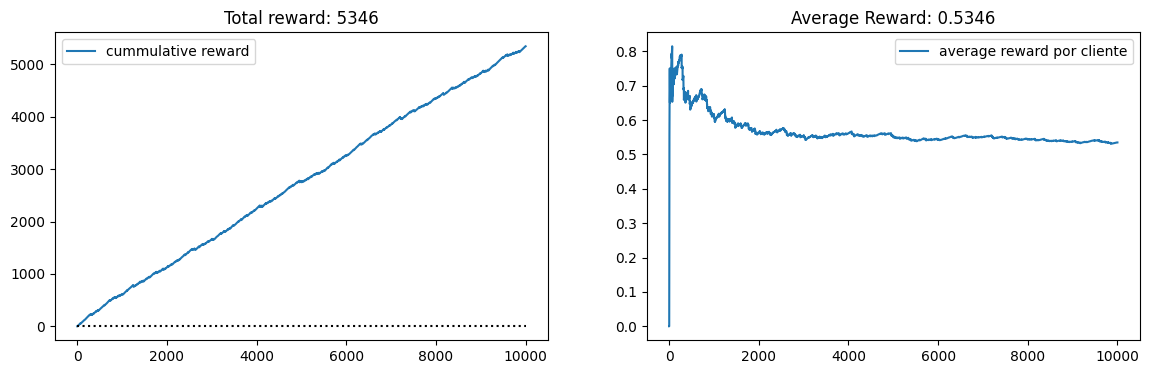

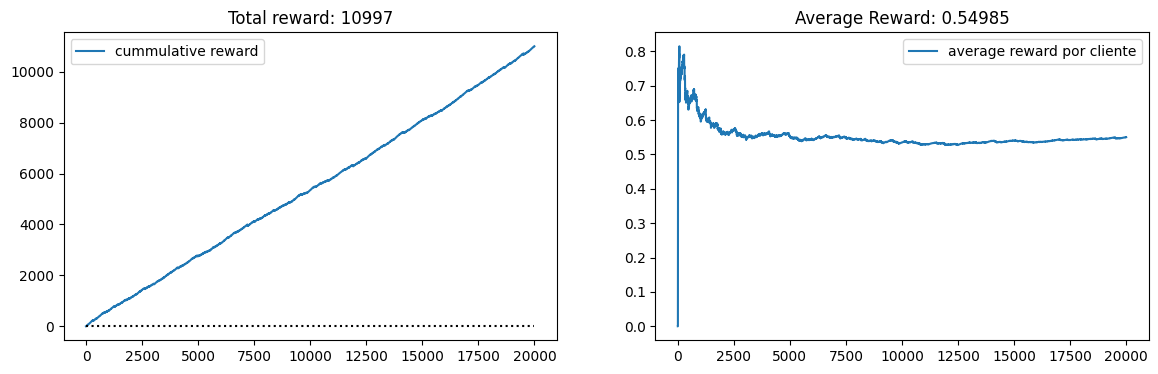

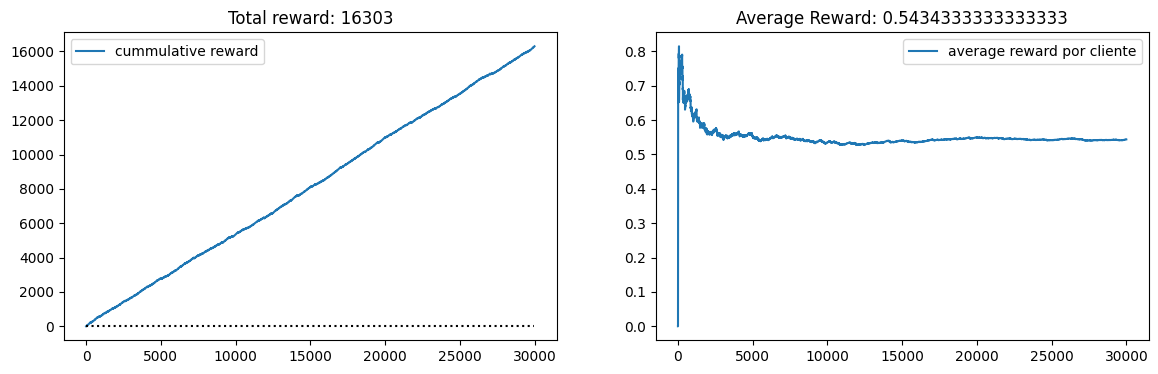

In [ ]:
records_test = explotacion(model, steps=len(cl_test.df), plot_frequency=10000, update=False)

Podemos comprobar que el resultado que obtenemos en test es muy similar a lo que estamos obteniendo en training

### Tarea 6

Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from libreria_aux_arboles import tree_to_code, tree_to_pseudo
from my_library import get_rules_from_tree
from graphviz import Source

def tree(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents):
  if RevolvingUtilizationOfUnsecuredLines <= 0.6038054823875427:
    if RevolvingUtilizationOfUnsecuredLines <= 0.2562236934900284:
      if NumberOfOpenCreditLinesAndLoans <= 9.5:
        return [[  980. 23807.]]
      else:  # if NumberOfOpenCreditLinesAndLoans > 9.5
        return [[ 1009. 15175.]]
    else:  # if RevolvingUtilizationOfUnsecuredLines > 0.2562236934900284
      return [[ 2225. 13029.]]
  else:  # if RevolvingUtilizationOfUnsecuredLines > 0.6038054823875427
    return [[ 8820. 10473.]]


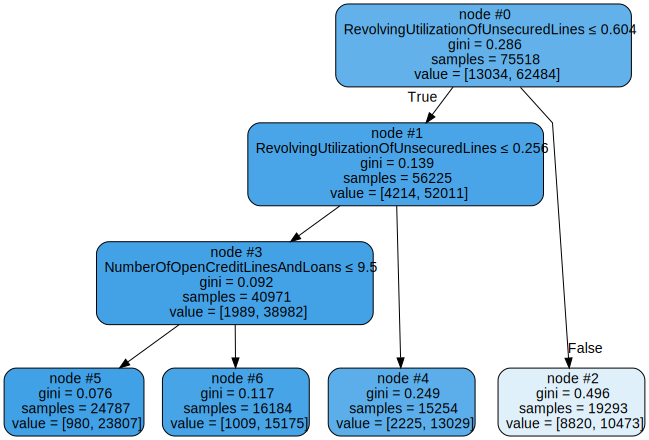

In [ ]:
startbold = '\033[1m'
endbold = '\033[0m'

clf = DecisionTreeClassifier(
    #max_depth=1,
    min_samples_split=0.3, # mínimo número de casos en un nodo para partirlo. 0.3 = 30% del total de casos
    min_samples_leaf=0.2,  # mínimo número de casos en nodo hoja. 0.2 = 20% del total de casos
    max_leaf_nodes=5, # máximo número de nodos hoja
    #min_weight_fraction_leaf=0.05,
    #min_impurity_decrease=0.15
    )

contextos = cl_train.df.drop(["SeriousDlqin2yrs"], axis=1)
acciones_predichas = [model.action(contexto) for contexto in contextos.values]


clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = contextos.columns

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

In [ ]:
action_names = ["acción {}".format(x) for x in clf.classes_]
rules = get_rules_from_tree(clf, attributes_names, action_names, contextos.values, np.array(acciones_predichas))

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

4 rules:

*  (RevolvingUtilizationOfUnsecuredLines <= 0.6038) and (RevolvingUtilizationOfUnsecuredLines <= 0.2562) and (NumberOfOpenCreditLinesAndLoans <= 9.5000) 
     acción 0: 980 cases (3.95%)
     acción 1: 23807 cases (96.05%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.6038) and (RevolvingUtilizationOfUnsecuredLines <= 0.2562) and (NumberOfOpenCreditLinesAndLoans > 9.5000) 
     acción 0: 1009 cases (6.23%)
     acción 1: 15175 cases (93.77%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.6038) and (RevolvingUtilizationOfUnsecuredLines > 0.2562) 
     acción 0: 2225 cases (14.59%)
     acción 1: 13029 cases (85.41%)
*  (RevolvingUtilizationOfUnsecuredLines > 0.6038) 
     acción 0: 8820 cases (45.72%)
     acción 1: 10473 cases (54.28%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Tarea 7

¿Qué ocurre en los puntos anteriores si ahora la penalización cuando el banco da un crédito a un cliente que no paga es -1? ¿Y si se va haciendo aún más pequeña la penalización?


In [ ]:
class clientes_new(clientes):
    
    def __init__(self, df, new_reward): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        super().__init__(df)
        self.new_reward = new_reward
    
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return self.new_reward
        return 1 # paga

In [ ]:
valor_optimo = (len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 0]) - len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 1])*1)/len(cl_train.df)

In [ ]:
valor_optimo

0.8525384676500967

In [ ]:
total_reward_random = []
total_reward_0 = []
total_reward_1 = []
total_regret_random = []
total_regret_0 = []
total_regret_1 = []

#Valores de acciones estimados
q0 = []
q1 = []
q0_rand = []
q1_rand = []

cl_train_new = clientes_new(df_train, -1)

for i in range(len(df_train)):
  
  #Simulación de llegada de cliente
  cl_train_new.cliente()
  accion = np.random.randint(2)

  r0 = cl_train_new.get_reward(0)
  total_reward_0.append(r0)
  q0.append(r0)
  #Obtenemos el regret para la acción restandole al valor óptimo 
  #el reward promedio que hemos obtenido al realizar esa acción.
  total_regret_0.append(valor_optimo - np.mean(q0))


  r1 = cl_train_new.get_reward(1)
  total_reward_1.append(r1)
  q1.append(r1)
  total_regret_1.append(valor_optimo - np.mean(q1))

  if accion == 0:
    total_reward_random.append(r0)
    q0_rand.append(r0)
    total_regret_random.append(valor_optimo - np.mean(q0_rand))
  else:
    total_reward_random.append(r1)
    q1_rand.append(r1)
    total_regret_random.append(valor_optimo - np.mean(q1_rand))

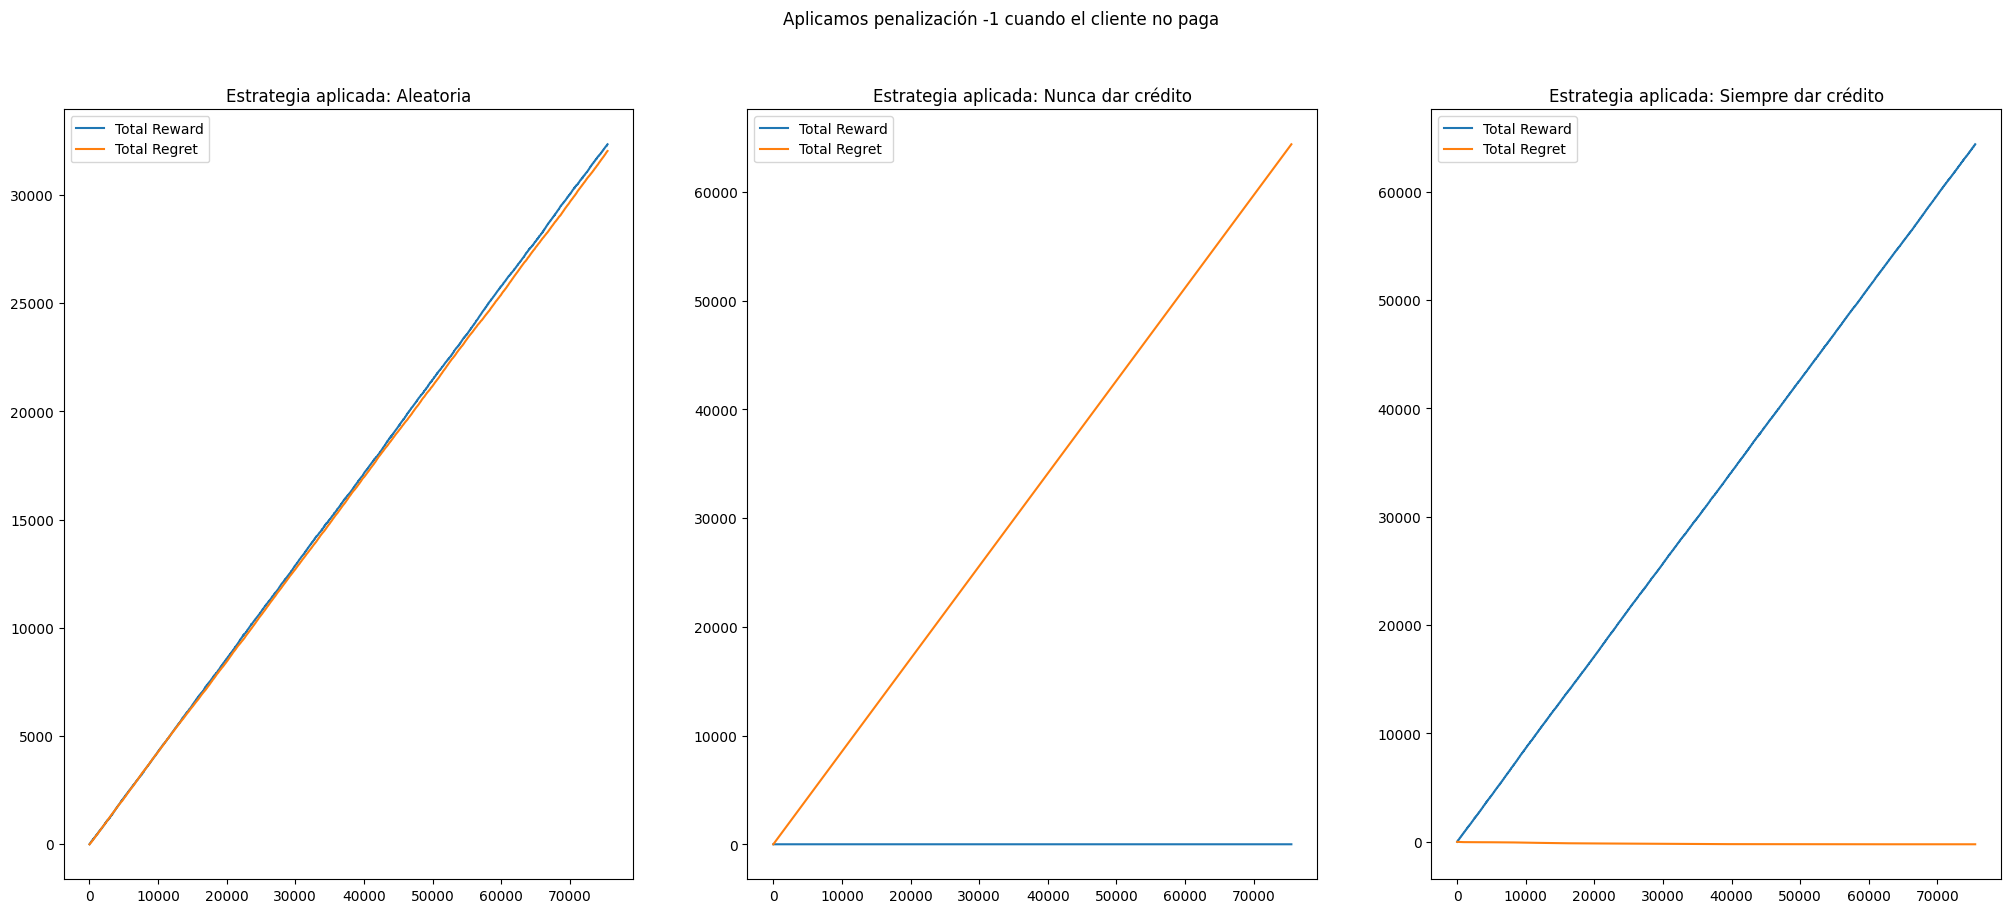

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random), label="Total Reward")
axs[0].plot(np.cumsum(total_regret_random), label="Total Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0), label="Total Reward")
axs[1].plot(np.cumsum(total_regret_0), label="Total Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1), label="Total Reward")
axs[2].plot(np.cumsum(total_regret_1), label="Total Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")

plt.suptitle("Aplicamos penalización -1 cuando el cliente no paga")
plt.show()

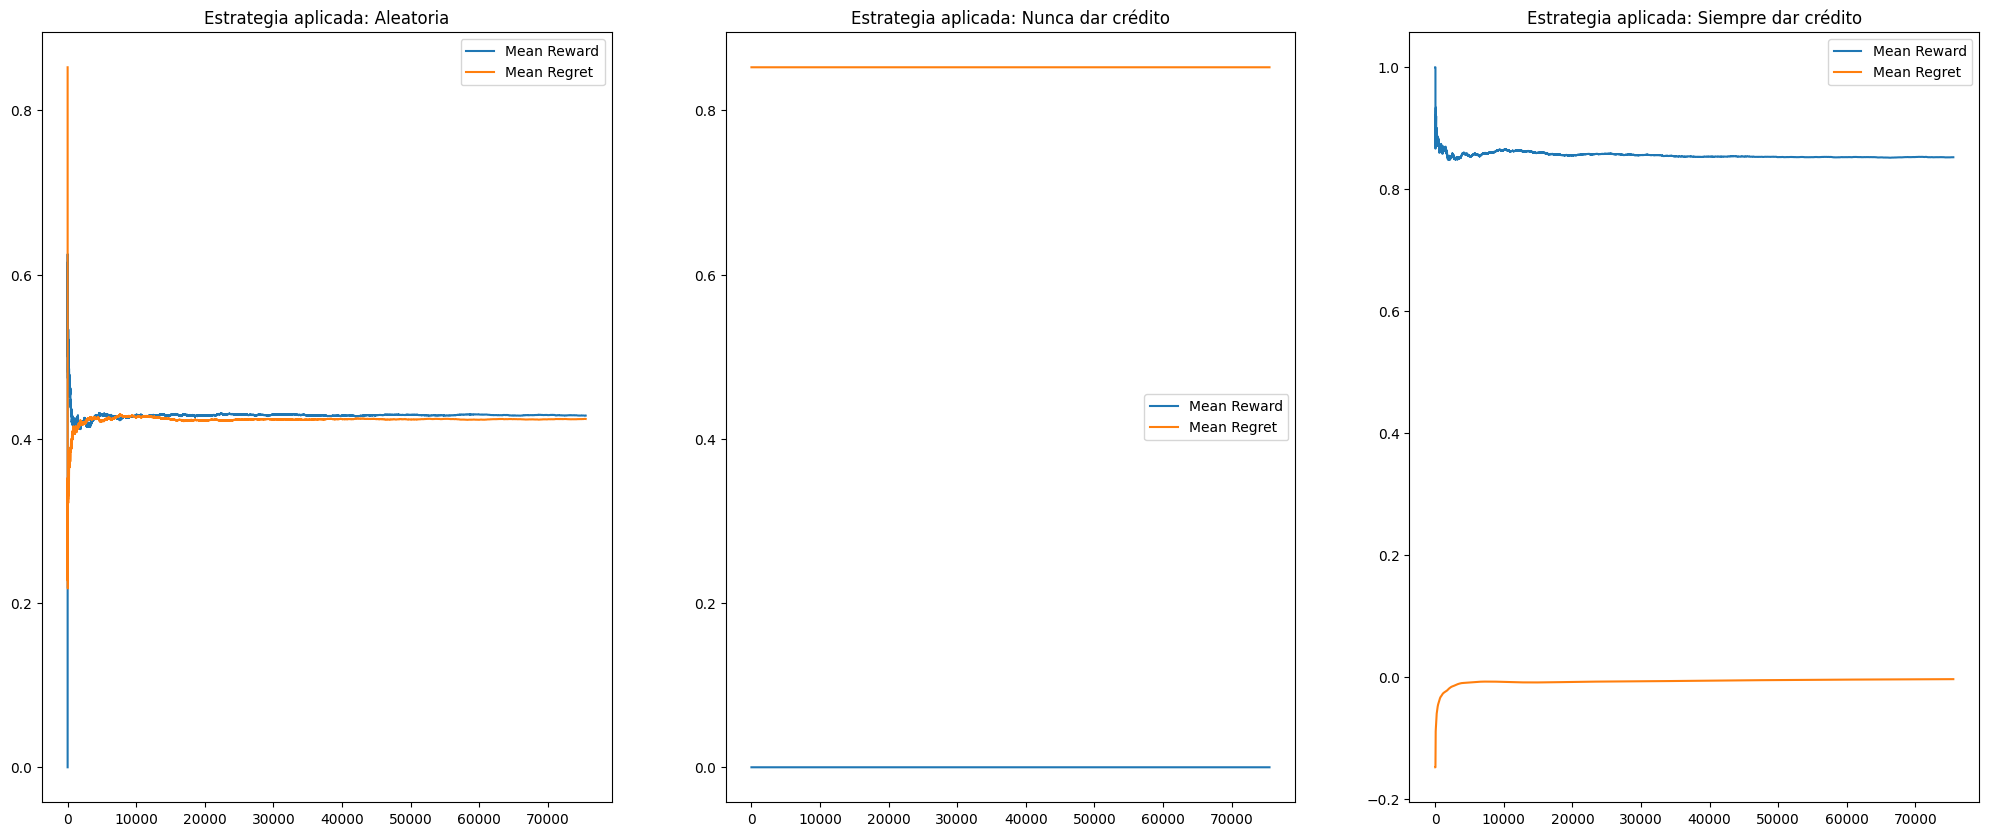

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[0].plot(np.cumsum(total_regret_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[1].plot(np.cumsum(total_regret_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[2].plot(np.cumsum(total_regret_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")
plt.show()

Teniendo en cuenta que ahora la penalización es menor, es importante resaltar ciertas observaciones.

- El valor óptimo es bastante mayor, por lo que ahora el regret en el agente que nunca da crédito es mayor

- El agente que actua de forma aleatoria acumula regret y reward prácticamente a la par, lo que se podría explicar a que el valor óptimo es cercano a 1.

- El reward del agente que siempre da crédito, evidentemente, es más alto.

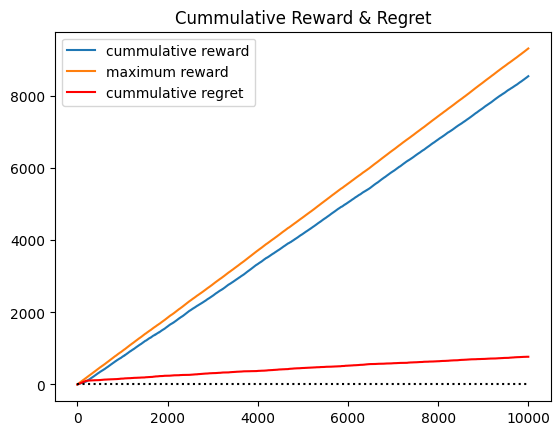

Total reward      : 8554
Total ideal reward: 9323


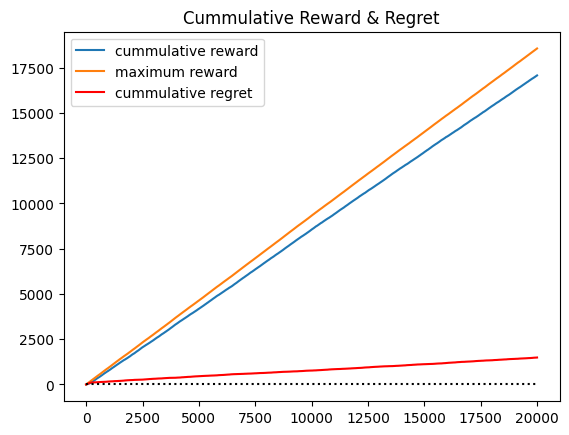

Total reward      : 17068
Total ideal reward: 18557


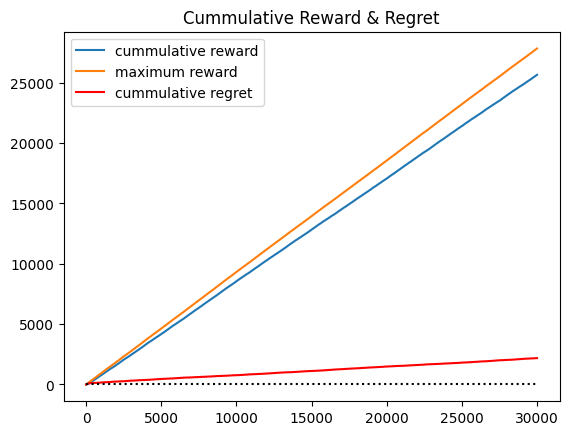

Total reward      : 25658
Total ideal reward: 27840


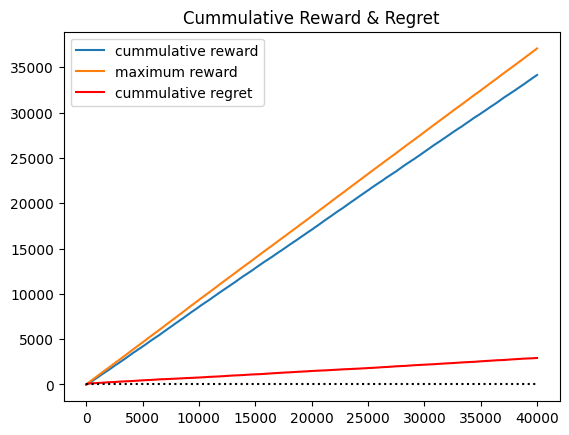

Total reward      : 34148
Total ideal reward: 37070


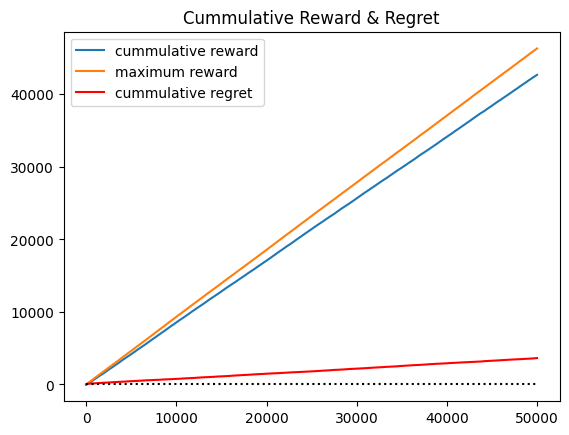

Total reward      : 42680
Total ideal reward: 46318


In [ ]:
acciones_ideales = {0: 1,
                    1: 0}

n_acciones = 2
n_features = len(cl_train_new.get_context())

model_new = LinearBandits(n_acciones, n_features, initial_pulls=100)

records = iterate_model(model_new, cl_train_new, acciones_ideales, steps=50000, plot_frequency=10000)

Aquí podemos observar como el multi-armed bandit contextual obtiene un reward total muy cercano al ideal. 

Esto nos lleva a pensar que lo que puede ocurrir es que, debido a que cuando la penalización era -10 penaliza mucho cada vez que falla, implica que el bandit podría ser más conservador para intentar evitar al máximo posible la penalización, pero como ahora la penalización está al mismo nivel que la recompensa, es más "arriesgado".

In [ ]:
model_new.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([ 9.82361613e-08,  2.33071672e-03, -1.32324475e-01,  5.58867297e-06,
         8.39393358e-07, -1.18275963e-03, -3.89027796e-01, -1.08777959e-02,
        -2.63361405e-01, -5.14308099e-03,  8.44173337e-01])]

#### Valores de Q obtenidos dado un contexto

In [ ]:
model_new.expected_values(cl_train.get_context().values)

array([0.        , 0.90783081])

In [ ]:
cl_train_new.get_context().values

array([9.08497741e-01, 5.70000000e+01, 0.00000000e+00, 4.65004666e-01,
       7.50000000e+03, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [ ]:
resultados = []

for accion in range(len(acciones)):
  resultado = 0
  for i in range(len(cl_train_new.get_context().values)):
    resultado += model_new.mu[accion][i] * cl_train_new.get_context().values[i]

  resultado += model_new.mu[accion][-1]
  resultados.append(resultado)

print(f"Valor de Q's para el contexto según el modelo: {model_new.expected_values(cl_train_new.get_context().values)}")
print(f"Valor de Q's para el contexto calculado a mano: {resultados}")

Valor de Q's para el contexto según el modelo: [0.         0.94459606]
Valor de Q's para el contexto calculado a mano: [0.0, 0.9445960593636535]


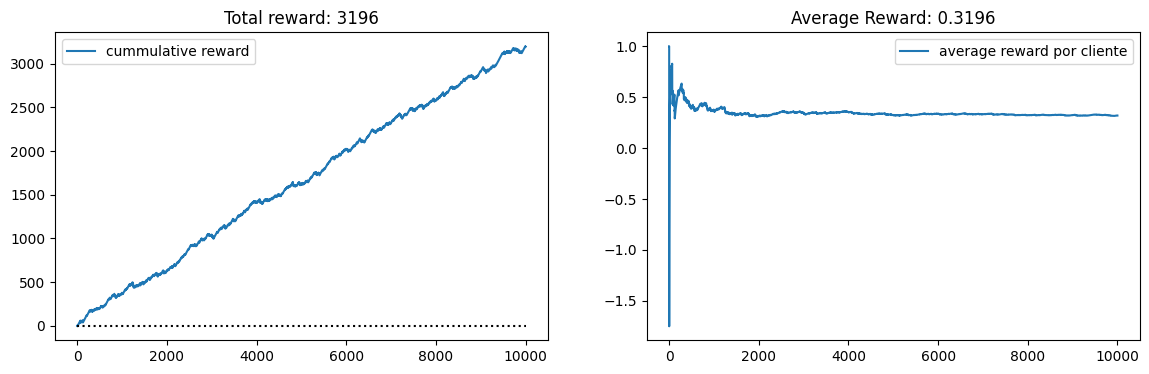

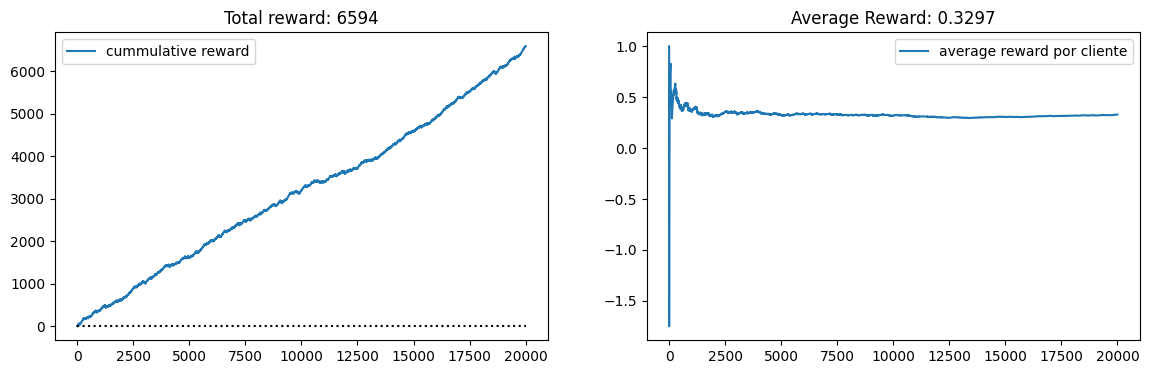

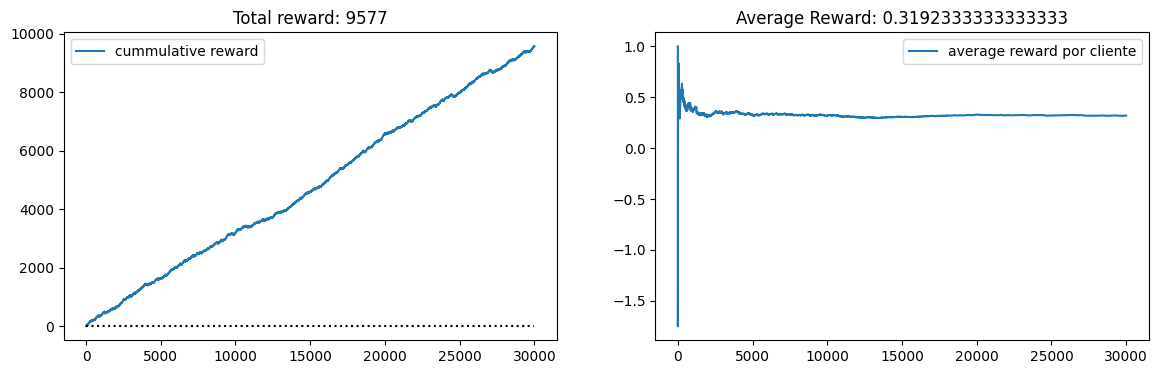

In [ ]:
cl_test_new = clientes_new(df_test, -1)
records_test = explotacion(model_new, steps=len(cl_test_new.df), plot_frequency=10000, update=False)

def tree(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents):
  if RevolvingUtilizationOfUnsecuredLines <= 0.7253451347351074:
    if RevolvingUtilizationOfUnsecuredLines <= 0.32192307710647583:
      if DebtRatio <= 0.3771403580904007:
        return [[   88. 29454.]]
      else:  # if DebtRatio > 0.3771403580904007
        return [[   86. 15048.]]
    else:  # if RevolvingUtilizationOfUnsecuredLines > 0.32192307710647583
      return [[  240. 15098.]]
  else:  # if RevolvingUtilizationOfUnsecuredLines > 0.7253451347351074
    return [[ 1301. 14203.]]


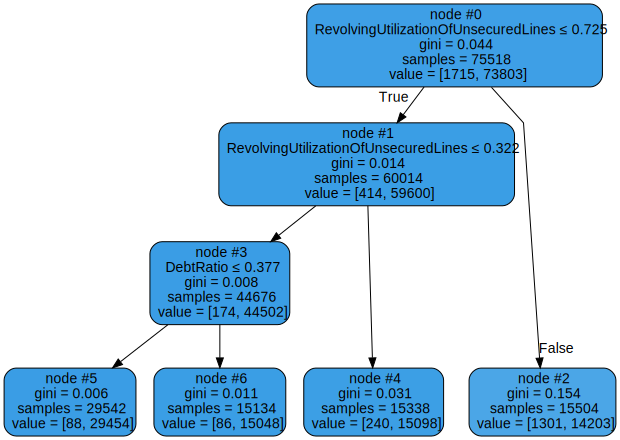

In [ ]:
startbold = '\033[1m'
endbold = '\033[0m'

clf = DecisionTreeClassifier(
    #max_depth=1,
    min_samples_split=0.3, # mínimo número de casos en un nodo para partirlo. 0.3 = 30% del total de casos
    min_samples_leaf=0.2,  # mínimo número de casos en nodo hoja. 0.2 = 20% del total de casos
    max_leaf_nodes=5, # máximo número de nodos hoja
    #min_weight_fraction_leaf=0.05,
    #min_impurity_decrease=0.15
    )

contextos = cl_train_new.df.drop(["SeriousDlqin2yrs"], axis=1)
acciones_predichas = [model_new.action(contexto) for contexto in contextos.values]


clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = contextos.columns

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

In [ ]:
action_names = ["acción {}".format(x) for x in clf.classes_]
rules = get_rules_from_tree(clf, attributes_names, action_names, contextos.values, np.array(acciones_predichas))

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

4 rules:

*  (RevolvingUtilizationOfUnsecuredLines <= 0.7253) and (RevolvingUtilizationOfUnsecuredLines <= 0.3219) and (DebtRatio <= 0.3771) 
     acción 0: 88 cases (0.30%)
     acción 1: 29454 cases (99.70%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.7253) and (RevolvingUtilizationOfUnsecuredLines <= 0.3219) and (DebtRatio > 0.3771) 
     acción 0: 86 cases (0.57%)
     acción 1: 15048 cases (99.43%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.7253) and (RevolvingUtilizationOfUnsecuredLines > 0.3219) 
     acción 0: 240 cases (1.56%)
     acción 1: 15098 cases (98.44%)
*  (RevolvingUtilizationOfUnsecuredLines > 0.7253) 
     acción 0: 1301 cases (8.39%)
     acción 1: 14203 cases (91.61%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Efectivamente, vemos que es mucho más arriesgado, viendo el número de veces que realiza la acción 0 es mucho menor que la anterior vez, incluso menos de lo que debería.

### Ahora probamos con una penalización de -0.5 para cuando el cliente no paga.

In [ ]:
valor_optimo = (len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 0]) - len(cl_train.df[cl_train.df["SeriousDlqin2yrs"] == 1])*.5)/len(cl_train.df)

In [ ]:
valor_optimo

0.8894038507375726

In [ ]:
total_reward_random = []
total_reward_0 = []
total_reward_1 = []
total_regret_random = []
total_regret_0 = []
total_regret_1 = []

#Valores de acciones estimados
q0 = []
q1 = []
q0_rand = []
q1_rand = []

cl_train_new = clientes_new(df_train, -0.5)

for i in range(len(df_train)):
  
  #Simulación de llegada de cliente
  cl_train_new.cliente()
  accion = np.random.randint(2)

  r0 = cl_train_new.get_reward(0)
  total_reward_0.append(r0)
  q0.append(r0)
  #Obtenemos el regret para la acción restandole al valor óptimo 
  #el reward promedio que hemos obtenido al realizar esa acción.
  total_regret_0.append(valor_optimo - np.mean(q0))


  r1 = cl_train_new.get_reward(1)
  total_reward_1.append(r1)
  q1.append(r1)
  total_regret_1.append(valor_optimo - np.mean(q1))

  if accion == 0:
    total_reward_random.append(r0)
    q0_rand.append(r0)
    total_regret_random.append(valor_optimo - np.mean(q0_rand))
  else:
    total_reward_random.append(r1)
    q1_rand.append(r1)
    total_regret_random.append(valor_optimo - np.mean(q1_rand))

#### Reward y regret acumulado

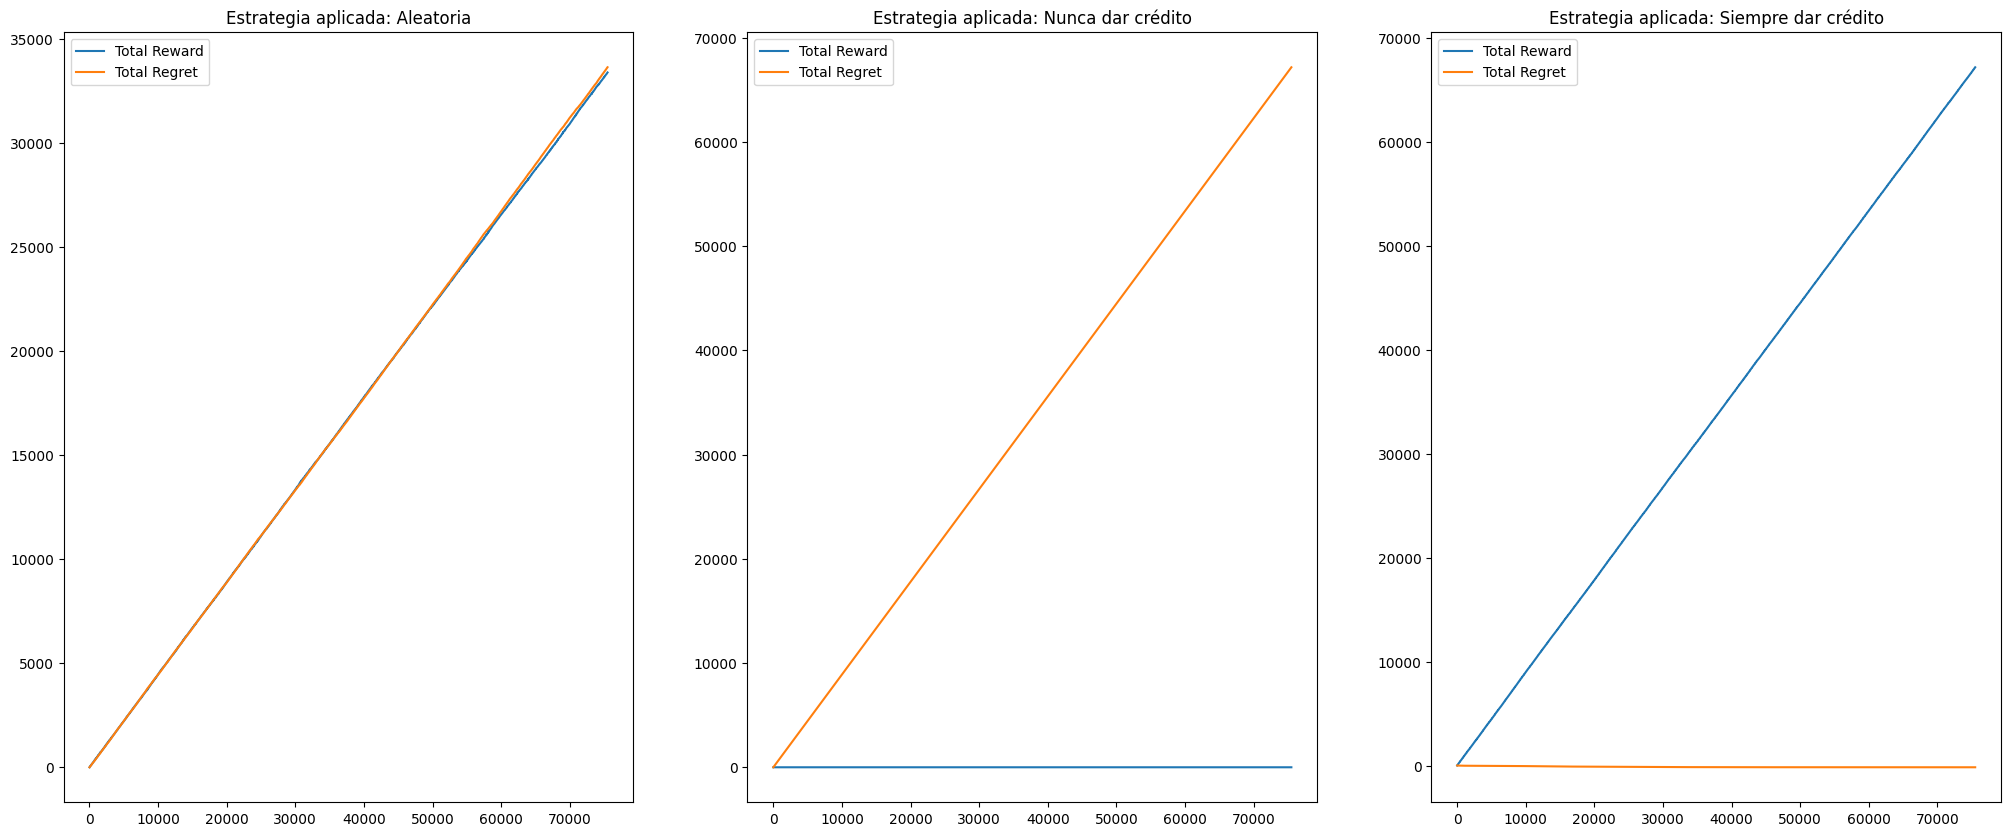

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random), label="Total Reward")
axs[0].plot(np.cumsum(total_regret_random), label="Total Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0), label="Total Reward")
axs[1].plot(np.cumsum(total_regret_0), label="Total Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1), label="Total Reward")
axs[2].plot(np.cumsum(total_regret_1), label="Total Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")
plt.show()

#### Reward y regret promedio

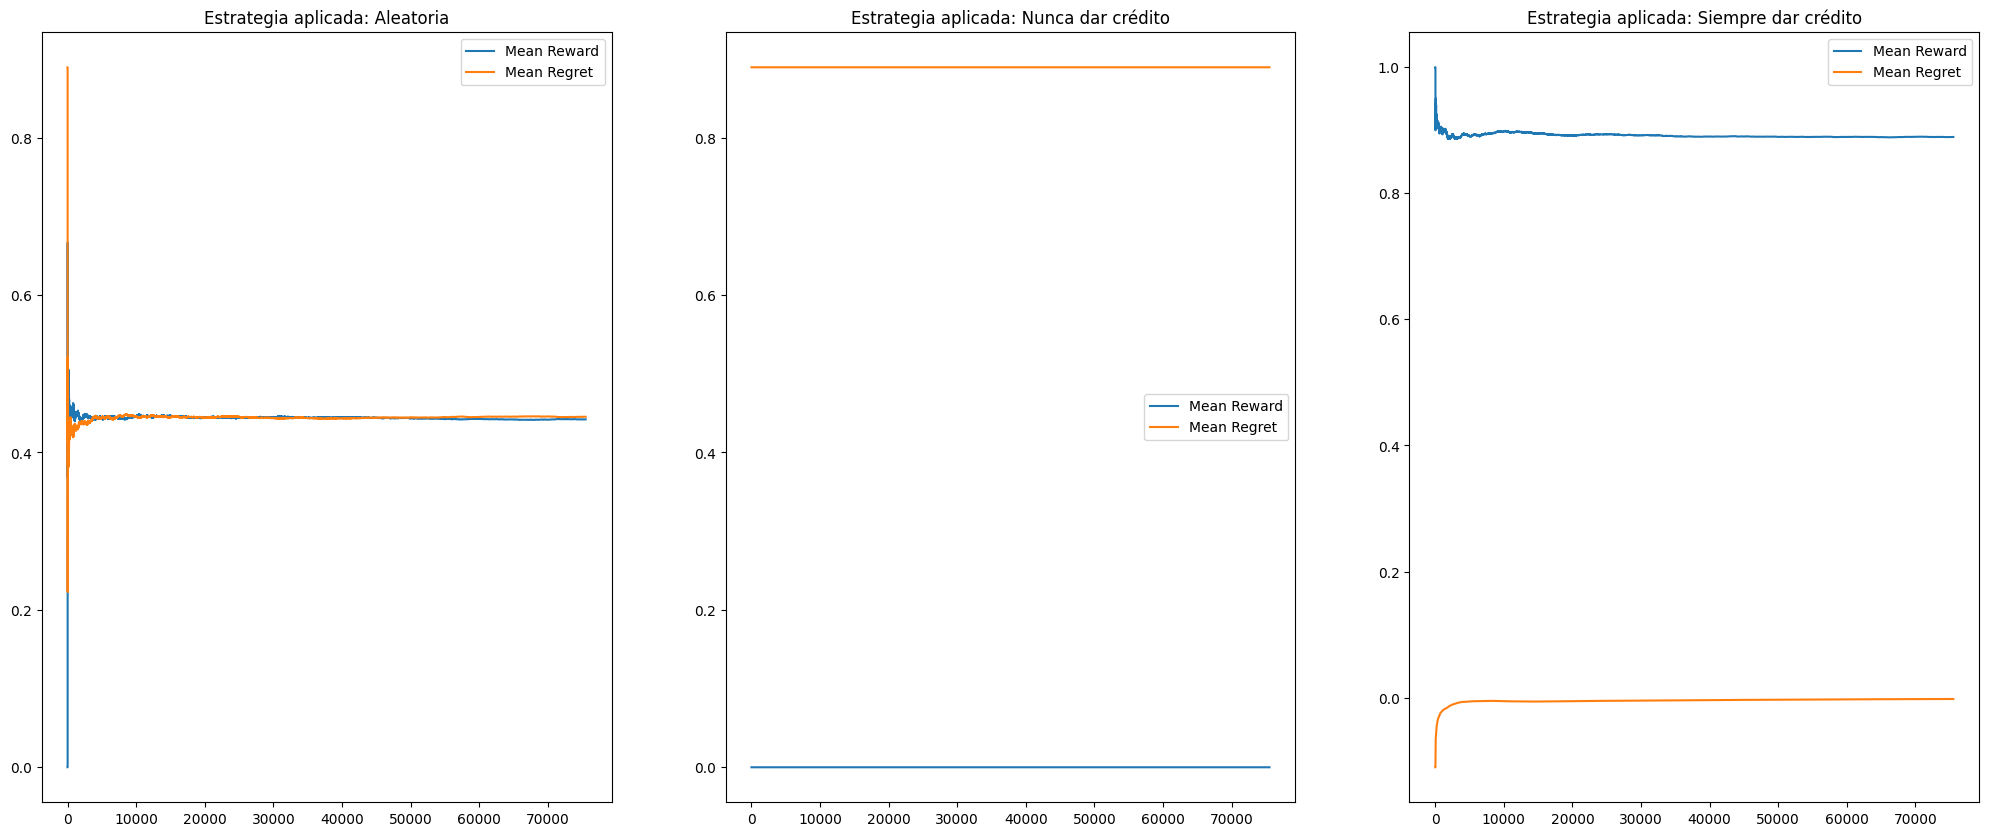

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

custom_ylim = (-10, 70000)

axs[0].plot(np.cumsum(total_reward_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[0].plot(np.cumsum(total_regret_random)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[0].legend()
axs[0].set_title("Estrategia aplicada: Aleatoria")

axs[1].plot(np.cumsum(total_reward_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[1].plot(np.cumsum(total_regret_0)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[1].legend()
axs[1].set_title("Estrategia aplicada: Nunca dar crédito")

axs[2].plot(np.cumsum(total_reward_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Reward")
axs[2].plot(np.cumsum(total_regret_1)/np.arange(1, len(total_reward_random) + 1), label="Mean Regret")
axs[2].legend()
axs[2].set_title("Estrategia aplicada: Siempre dar crédito")
plt.show()

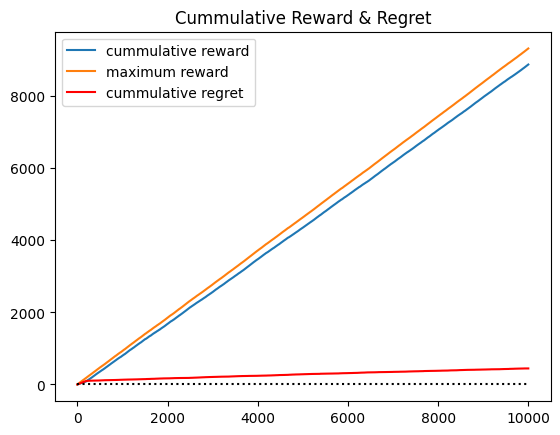

Total reward      : 8878.0
Total ideal reward: 9323


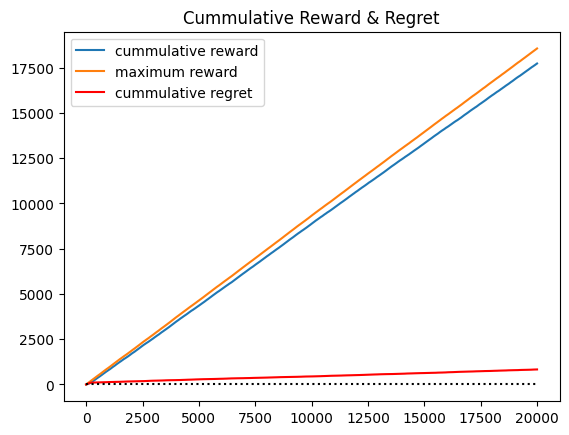

Total reward      : 17727.0
Total ideal reward: 18557


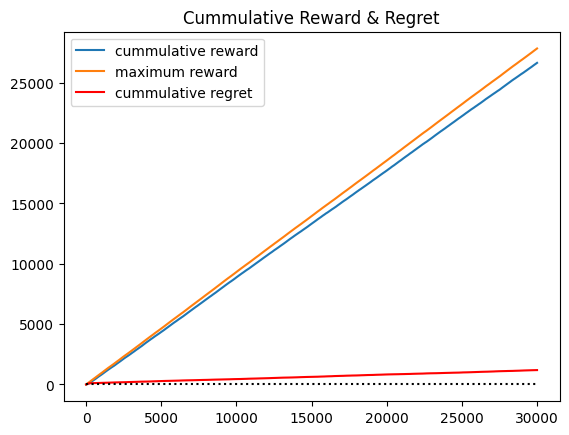

Total reward      : 26648.0
Total ideal reward: 27840


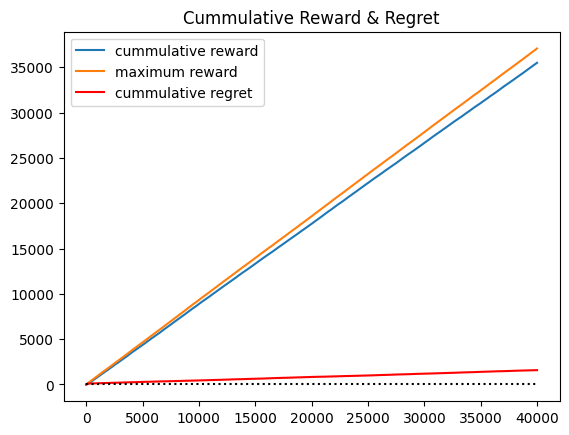

Total reward      : 35490.0
Total ideal reward: 37070


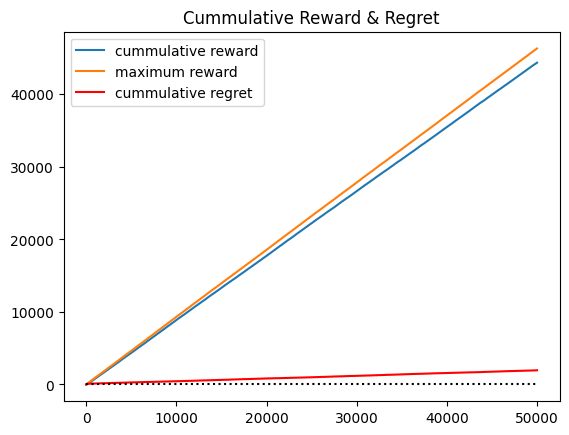

Total reward      : 44360.5
Total ideal reward: 46318


In [ ]:
n_features = len(cl_train_new.get_context())

model_new = LinearBandits(n_acciones, n_features, initial_pulls=100)

records = iterate_model(model_new, cl_train_new, acciones_ideales, steps=50000, plot_frequency=10000)

In [ ]:
model_new.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-4.97699133e-07,  1.80691902e-03, -9.62067841e-02,  3.31401181e-06,
         6.24084465e-07, -6.83831098e-04, -2.60569187e-01, -8.55072555e-03,
        -1.82045122e-01, -3.55948736e-03,  8.76866620e-01])]

#### Valores de Q obtenidos dado un contexto

In [ ]:
model_new.expected_values(cl_train_new.get_context().values)

array([0.        , 0.95704348])

In [ ]:
cl_train_new.get_context().values

array([9.08497741e-01, 5.70000000e+01, 0.00000000e+00, 4.65004666e-01,
       7.50000000e+03, 1.00000000e+01, 0.00000000e+00, 2.00000000e+00,
       0.00000000e+00, 1.00000000e+00])

In [ ]:
resultados = []

for accion in range(len(acciones)):
  resultado = 0
  for i in range(len(cl_train_new.get_context().values)):
    resultado += model_new.mu[accion][i] * cl_train_new.get_context().values[i]

  resultado += model_new.mu[accion][-1]
  resultados.append(resultado)

print(f"Valor de Q's para el contexto según el modelo: {model_new.expected_values(cl_train_new.get_context().values)}")
print(f"Valor de Q's para el contexto calculado a mano: {resultados}")

Valor de Q's para el contexto según el modelo: [0.         0.95704348]
Valor de Q's para el contexto calculado a mano: [0.0, 0.9570434767968433]


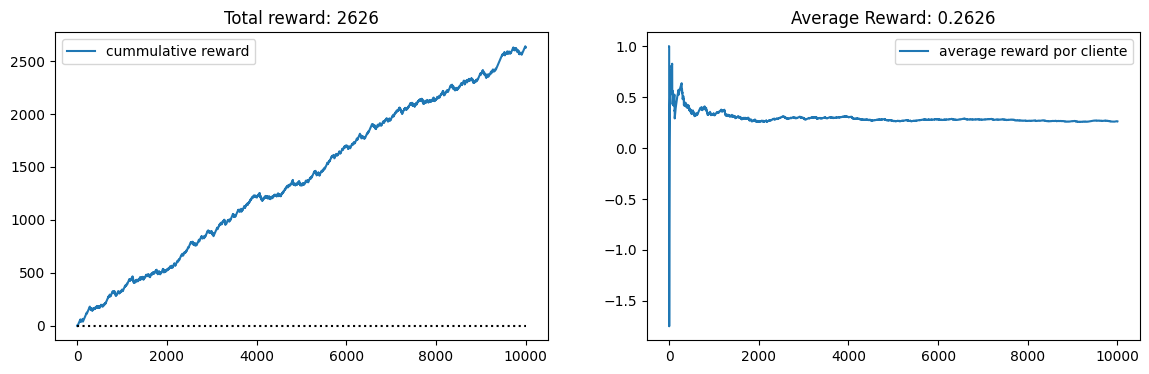

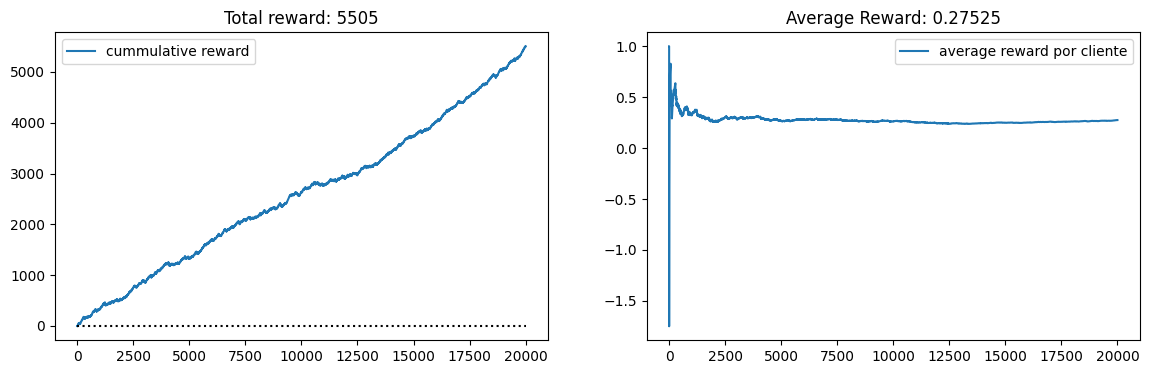

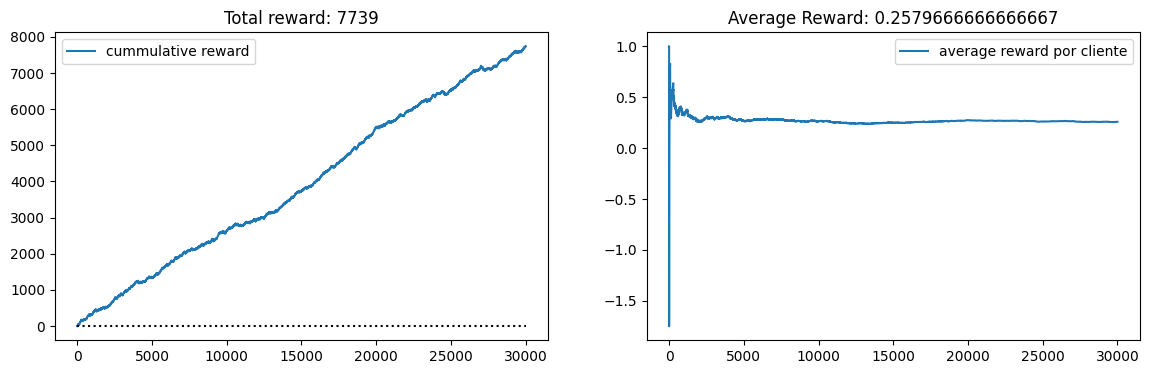

In [ ]:
cl_test_new = clientes_new(df_test, -0.5)
records_test = explotacion(model_new, steps=len(cl_test_new.df), plot_frequency=10000, update=False)

def tree(RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents):
  if RevolvingUtilizationOfUnsecuredLines <= 0.731926292181015:
    if RevolvingUtilizationOfUnsecuredLines <= 0.2968434542417526:
      if MonthlyIncome <= 6703.5:
        return [[   40. 25319.]]
      else:  # if MonthlyIncome > 6703.5
        return [[1.0000e+01 1.7919e+04]]
    else:  # if RevolvingUtilizationOfUnsecuredLines > 0.2968434542417526
      return [[  111. 16792.]]
  else:  # if RevolvingUtilizationOfUnsecuredLines > 0.731926292181015
    return [[  658. 14669.]]


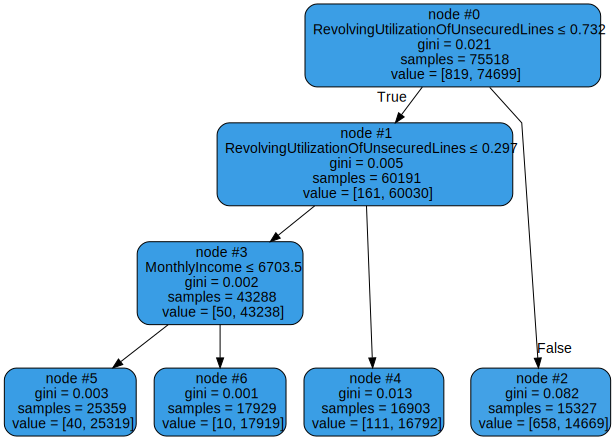

In [ ]:
startbold = '\033[1m'
endbold = '\033[0m'

clf = DecisionTreeClassifier(
    #max_depth=1,
    min_samples_split=0.3, # mínimo número de casos en un nodo para partirlo. 0.3 = 30% del total de casos
    min_samples_leaf=0.2,  # mínimo número de casos en nodo hoja. 0.2 = 20% del total de casos
    max_leaf_nodes=5, # máximo número de nodos hoja
    #min_weight_fraction_leaf=0.05,
    #min_impurity_decrease=0.15
    )

contextos = cl_train_new.df.drop(["SeriousDlqin2yrs"], axis=1)
acciones_predichas = [model_new.action(contexto) for contexto in contextos.values]


clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = contextos.columns

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

In [ ]:
action_names = ["acción {}".format(x) for x in clf.classes_]
rules = get_rules_from_tree(clf, attributes_names, action_names, contextos.values, np.array(acciones_predichas))

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

4 rules:

*  (RevolvingUtilizationOfUnsecuredLines <= 0.7319) and (RevolvingUtilizationOfUnsecuredLines <= 0.2968) and (MonthlyIncome <= 6703.5000) 
     acción 0: 40 cases (0.16%)
     acción 1: 25319 cases (99.84%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.7319) and (RevolvingUtilizationOfUnsecuredLines <= 0.2968) and (MonthlyIncome > 6703.5000) 
     acción 0: 10 cases (0.06%)
     acción 1: 17919 cases (99.94%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.7319) and (RevolvingUtilizationOfUnsecuredLines > 0.2968) 
     acción 0: 111 cases (0.66%)
     acción 1: 16792 cases (99.34%)
*  (RevolvingUtilizationOfUnsecuredLines > 0.7319) 
     acción 0: 658 cases (4.29%)
     acción 1: 14669 cases (95.71%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


En este vemos que se repite lo mismo que hemos comentado para cuando el reward es -1, pero se refuerza mucho más, no otorgando crédito muchas menos veces de las que debería. También se puede ver como las reglas del clasificador son diferentes. Llegados a este punto pensamos que parte de plantear un bandit que tenga mejor idea a la hora de discriminar mejor a quién dar y a quién no dar está en como codificamos los refuerzos, y en este caso pensamos que se debería penalizar en un punto intermedio a como lo hemos estado haciendo.

### Tarea 8

Optimiza tu sistema haciendo selección de variables.

Para hacer la selección de variables, nos quedamos con las variables del dataset que hemos visto que árbol de decisión ha considerado más importantes. Probamos para penalización -10 igual que inicialmente.

In [39]:
df_clean = df[["SeriousDlqin2yrs", "RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans"]]
df_clean.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans
0,1,0.766127,13
1,0,0.957151,4
2,0,0.658180,2
3,0,0.233810,5
4,0,0.907239,7


In [40]:
df_train_clean, df_test_clean = train_test_split(df_clean, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

cl_train_clean = clientes(df_train_clean)
cl_test_clean  = clientes(df_test_clean)

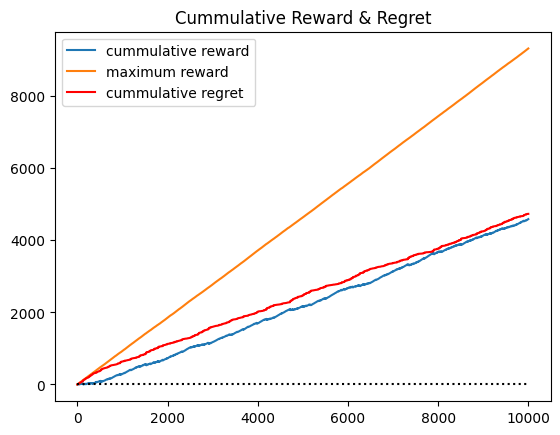

Total reward      : 4589
Total ideal reward: 9323


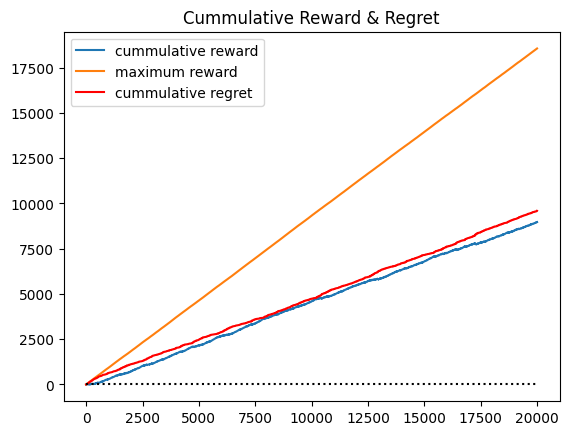

Total reward      : 8967
Total ideal reward: 18557


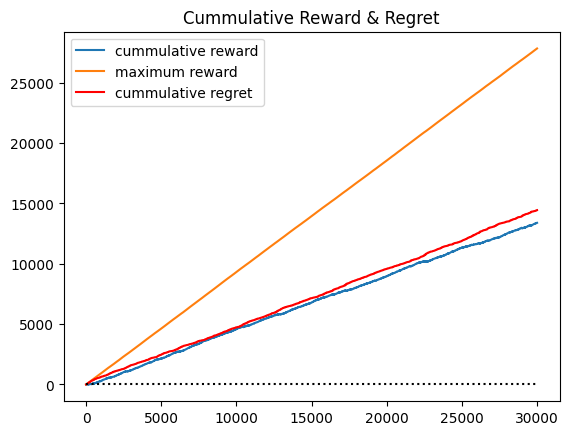

Total reward      : 13391
Total ideal reward: 27840


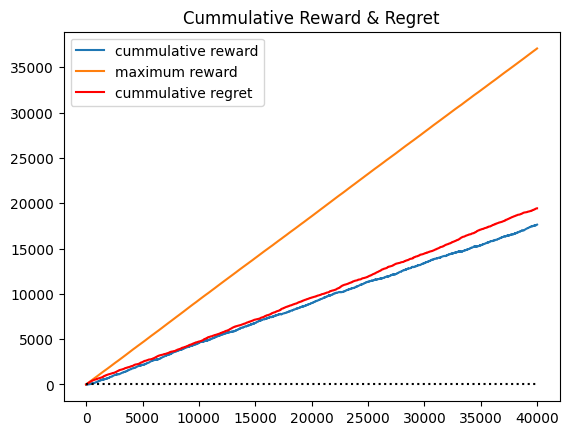

Total reward      : 17634
Total ideal reward: 37070


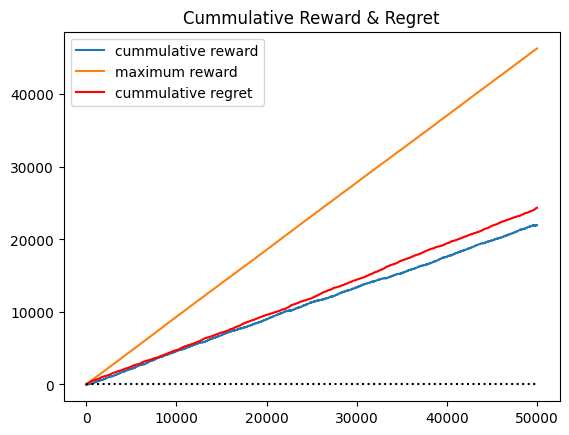

Total reward      : 21961
Total ideal reward: 46318


In [44]:
n_features = len(cl_train_clean.get_context())

model = LinearBandits(n_acciones, n_features, initial_pulls=100)

records = iterate_model(model, cl_train_clean, acciones_ideales, steps=50000, plot_frequency=10000)

Coeficientes del modelo linieal y valores de Q.

In [45]:
model.mu

[array([0., 0., 0.]), array([-1.2811991 , -0.01054271,  0.90328634])]

In [46]:
model.expected_values(cl_train_clean.get_context().values)

array([ 0.        , -0.36610727])

In [47]:
cl_train_clean.get_context().values

array([ 0.90849774, 10.        ])

In [48]:
resultados = []

for accion in range(len(acciones)):
  resultado = 0
  for i in range(len(cl_train_clean.get_context().values)):
    resultado += model.mu[accion][i] * cl_train_clean.get_context().values[i]

  resultado += model.mu[accion][-1]
  resultados.append(resultado)

print(f"Valor de Q's para el contexto según el modelo: {model.expected_values(cl_train_clean.get_context().values)}")
print(f"Valor de Q's para el contexto calculado a mano: {resultados}")

Valor de Q's para el contexto según el modelo: [ 0.         -0.36610727]
Valor de Q's para el contexto calculado a mano: [0.0, -0.36610727302694634]


Evaluamos el conjunto de test.

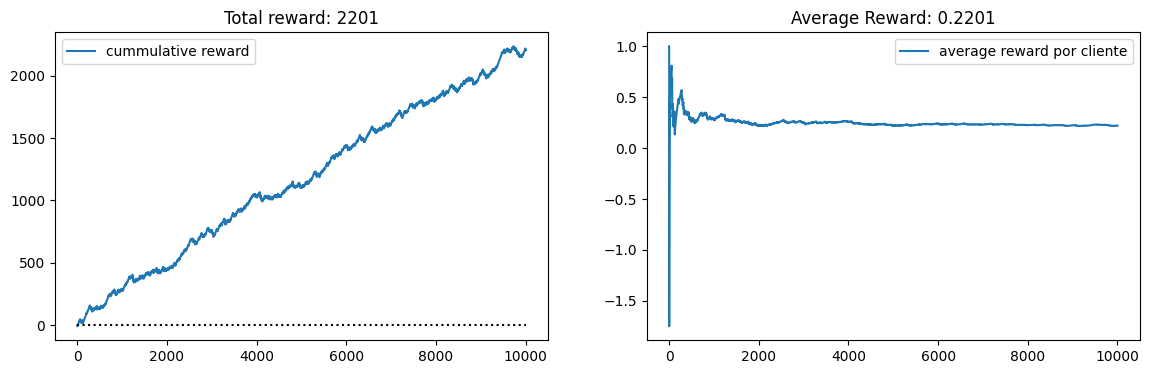

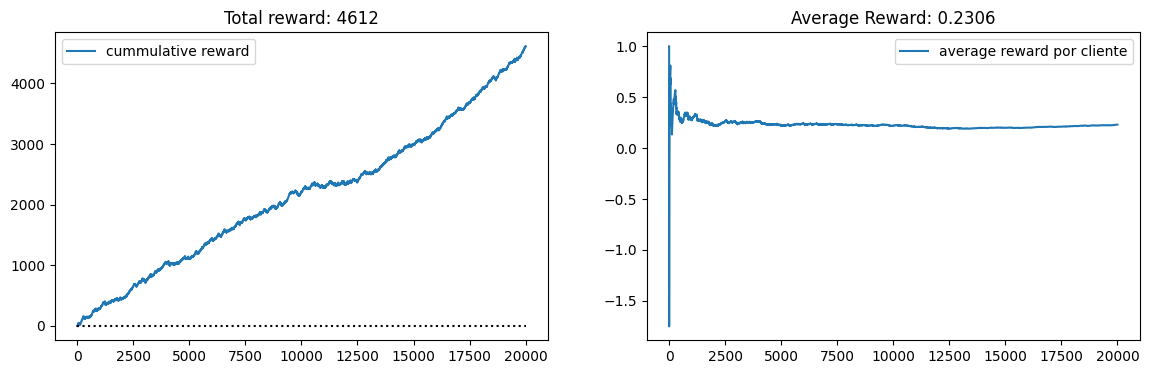

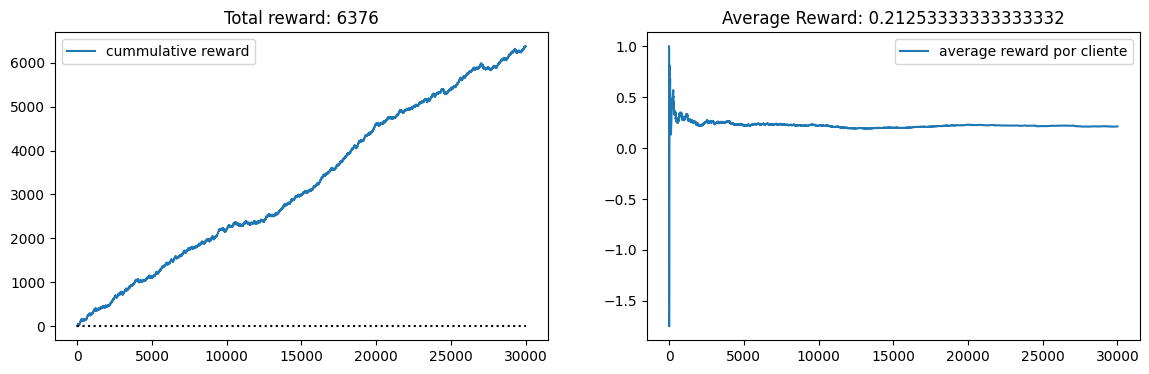

In [51]:
records_test = explotacion(model, steps=len(cl_test_clean.df), plot_frequency=10000, update=False)

In [52]:
contextos = cl_train_clean.df.drop(["SeriousDlqin2yrs"], axis=1)
acciones_predichas = [model.action(contexto) for contexto in contextos.values]

In [55]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from libreria_aux_arboles import tree_to_code, tree_to_pseudo
from my_library import get_rules_from_tree
from graphviz import Source

def tree(RevolvingUtilizationOfUnsecuredLines, NumberOfOpenCreditLinesAndLoans):
  if RevolvingUtilizationOfUnsecuredLines <= 0.6357133090496063:
    if RevolvingUtilizationOfUnsecuredLines <= 0.2762373089790344:
      return [[    0. 42125.]]
    else:  # if RevolvingUtilizationOfUnsecuredLines > 0.2762373089790344
      return [[  718. 14386.]]
  else:  # if RevolvingUtilizationOfUnsecuredLines > 0.6357133090496063
    return [[17828.   461.]]


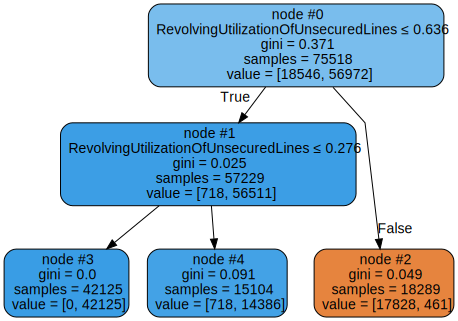

In [57]:
clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = contextos.columns

tree_to_code(clf, attributes_names, start_bold=startbold, end_bold=endbold)

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

In [58]:
action_names = ["acción {}".format(x) for x in clf.classes_]
rules = get_rules_from_tree(clf, attributes_names, action_names, contextos.values, np.array(acciones_predichas))

print(len(rules), "rules:\n")
for item in rules.items():
    print('\033[1m' + "* ", item[1][0], '\033[0m')
    for c in item[1][1]:
        print("     "+c[0]+":", c[1], "cases (%.2f%%)" % (100*c[2]))

3 rules:

*  (RevolvingUtilizationOfUnsecuredLines <= 0.6357) and (RevolvingUtilizationOfUnsecuredLines <= 0.2762) 
     acción 0: 0 cases (0.00%)
     acción 1: 42125 cases (100.00%)
*  (RevolvingUtilizationOfUnsecuredLines <= 0.6357) and (RevolvingUtilizationOfUnsecuredLines > 0.2762) 
     acción 0: 718 cases (4.75%)
     acción 1: 14386 cases (95.25%)
*  (RevolvingUtilizationOfUnsecuredLines > 0.6357) 
     acción 0: 17828 cases (97.48%)
     acción 1: 461 cases (2.52%)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Como se puede observar, pese a que hemos hecho uso de las variables que antes el árbol ha considerado esenciales para distinguir si dar crédito o no, ahora obtenemos otros valores numéricos a la hora de decidir, de hecho, solo hace uso de el criterio `RevolvingUtilizationOfUnsecuredLines` para decidir. Esto puede ser debido a que realmente, como el modelo es contextual, para el caso anterior se entrena con más variables por lo que tiene más cosas en cuenta. En este caso, al estar entrenado únicamente con estas dos variables, digamos que emplea fuerza bruta a la hora de distinguir las acciones.

### Tarea 9

Investiga otras librerías que permitan implementar multiarmed bandits contextuales no lineales.

La librería que usaremos proviene de https://github.com/alison-carrera/onn. El paquete ONN_THS actúa como un contextual bandit no lineal. Este algoritmo hace uso del factor de explotación no lineal más un factor de exploración proveniente del algoritmo de smapling de Thompson. Primero, nos quedaremos únicamente con los datos asociados a `NumberOfOpenCreditLinesAndLoans` y `RevolvingUtilizationOfUnsecuredLines`, ya que hemos visto que son los más relevantes, y luego haremos uso de todos.

In [32]:
pip install onn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for onn: filename=onn-0.2.1-py3-none-any.whl size=4671 sha256=15f7ea757f55f58001220b7db217070d8b8c06ccb951074602627e161909e0ae
  Stored in directory: /root/.cache/pip/wheels/68/04/51/ba57f08359d3f68dfbc546040f7b35cb1f1f7ed745cecadf25
  Created wheel for mabalgs: filename=mabalgs-0.6.8-py3-none-any.whl size=9692 sha256=6b2e3532098a904af8b9ecba905ce8cc1e04fcc0439a03f4a3f7b10a1e6b7957
  Stored in directory: /root/.cache/pip/wheels/ae/ef/14/d321630783083f8b15f8152ed5d78b8b32419017bd737a5bbe
Successfully built onn mabalgs


In [83]:
from onn.OnlineNeuralNetwork import ONN_THS

In [84]:
onn_network = ONN_THS(2, 5, 100, 2, use_cuda=True)

from sklearn.metrics import accuracy_score, balanced_accuracy_score

Using CUDA :]


In [85]:
X_train = df_train_clean[["RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans"]]
Y_train = df_train_clean["SeriousDlqin2yrs"]

X_test = df_test_clean[["RevolvingUtilizationOfUnsecuredLines", "NumberOfOpenCreditLinesAndLoans"]]
Y_test = df_test_clean["SeriousDlqin2yrs"]

In [86]:
for i in range(len(X_train)):
    x = np.asarray([np.asarray(X_train)[i, :]])
    y = np.asarray([np.asarray(Y_train)[i]])

    arm, exp = onn_network.predict(x)
        
    if arm == y[0]:  
      onn_network.partial_fit(x, y, exp)
          
      if i % 5000 == 4999:
        pred = []
        print("======================================================")
        for i in range(len(X_test)):  
          pred.append(onn_network.predict(np.asarray([np.asarray(X_test)[i, :]]))[0])
        print("Accuracy: " + str(balanced_accuracy_score(Y_test, pred)))
        print("======================================================")

print('Finished Training')

Alpha:[0.24281037 0.23034391 0.21044694 0.18204424 0.13435455]
Training Loss: 0.0819869
Alpha:[0.24493282 0.22954014 0.20857388 0.18034805 0.1366051 ]
Training Loss: 0.038626872
Alpha:[0.25170484 0.2259162  0.2034355  0.17562081 0.1433226 ]
Training Loss: 0.061711367
Alpha:[0.253156   0.22627461 0.20304643 0.17462298 0.14289996]
Training Loss: 0.011874676
Alpha:[0.2564239  0.22504446 0.20102753 0.17300205 0.1445021 ]
Training Loss: 0.029272486
Alpha:[0.27500176 0.22062461 0.19253656 0.16457336 0.14726372]
Training Loss: 0.07545248
Alpha:[0.27980185 0.2191455  0.19004864 0.16204543 0.14895855]
Training Loss: 0.029881451
Alpha:[0.28539273 0.21743807 0.18645671 0.1588604  0.15185207]
Training Loss: 0.04551668
Accuracy: 0.4973635288764723
Alpha:[0.2899311  0.21637544 0.18447532 0.15664889 0.15256922]
Training Loss: 0.028067436
Alpha:[0.2946138  0.21479815 0.18177648 0.15388834 0.15492325]
Training Loss: 0.04736645
Alpha:[0.29647568 0.21442638 0.18067531 0.15267514 0.15574744]
Training Loss

Como se puede observar, los coeficientes `alpha` son coeficientes asociados a las 5 capas ocultas. También podemos ver como la precisión se queda estancada por lo que este método no parece en absoluto óptimo.

Si probamos con el conjunto de datos completo, obtendremos `nan` a partir de la segunda iteración. Por lo que este método no parece óptimo, al menos para esta tarea con este conjunto de datos.

In [91]:
X_train_2 = df_train.loc[:, df_train.columns != "SeriousDlqin2yrs"]
Y_train_2 = df_train["SeriousDlqin2yrs"]

X_test_2 = df_test.loc[:, df_test.columns != "SeriousDlqin2yrs"]
Y_test_2 = df_test["SeriousDlqin2yrs"]

In [92]:
onn_network = ONN_THS(10, 5, 100, 5, use_cuda=True)

Using CUDA :]


In [93]:
for i in range(len(X_train_2)):
    x = np.asarray([np.asarray(X_train_2)[i, :]])
    y = np.asarray([np.asarray(Y_train_2)[i]])

    arm, exp = onn_network.predict(x)
        
    if arm == y[0]:  
      onn_network.partial_fit(x, y, exp)
         
    if i % 5000 == 4999:
      pred = []
      print("======================================================")
      for i in range(len(X_test_2)):  
        pred.append(onn_network.predict(np.asarray([np.asarray(X_test_2)[i, :]]))[0])
      print("Accuracy: " + str(balanced_accuracy_score(Y_test_2, pred)))
      print("======================================================")

print('Finished Training')

Alpha:[0.13043645 0.13043645 0.3006671  0.13043621 0.30802384]
Training Loss: 0.2322887
Alpha:[0.13048902 0.13048902 0.30078828 0.13048866 0.30774498]
Training Loss: 0.0
Alpha:[0.04       0.04       0.14987212 0.17738275 0.59274507]
Training Loss: 315249920.0
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.480092805673667
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4796615803736547
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4335850057320091
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.46655484348963244
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.47966508240596584
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4813068225712735
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.48096168715138876
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.47885375728363305
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4296836229059699
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4670457780910454
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4782033019649099
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4805759323507456
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4818383765534449
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.4802829849013896
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan
Alpha:[nan nan nan nan nan]
Training Loss: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Accuracy: 0.48132350091277926
Alpha:[nan nan nan nan nan]
Training Loss: nan
Finished Training
